## Analysis v3

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import index_natsorted

In [3]:
# import the data
filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/ASCL1_ASCL1_HUMAN.H11MO.0.A_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'ASCL1_ASCL1_HUMAN.H11MO.0.A'

In [4]:
matrix_afps

Chromosome     Start       End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0           chr1    183695    183709           0.00000            0.00000   
1           chr1    268000    268014           0.00000            0.00000   
2           chr1    779045    779059           0.00000            0.00000   
3           chr1    818731    818745           0.03115            0.03309   
4           chr1    898815    898829           0.03365            0.02102   
...          ...       ...       ...               ...                ...   
22785       chrY  10098815  10098829           0.02153            0.02309   
22786       chrY  11107186  11107200           0.00000            0.00000   
22787       chrY  11107235  11107249           0.00000            0.00000   
22788       chrY  11116171  11116185           0.00000            0.00000   
22789       chrY  14882875  14882889           0.00175            0.00087   

       S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0               0.00000           0.00000           0.00000   
1               0.00000           0.00000           0.00000   
2               0.00000           0.00000           0.00000   
3               0.03269           0.03930           0.03563   
4               0.03896           0.03048           0.03007   
...                 ...               ...               ...   
22785           0.02438           0.02204           0.03428   
22786           0.00000           0.00000           0.00000   
22787           0.00000           0.00000           0.00000   
22788           0.00000           0.00000           0.00000   
22789           0.00173           0.00394           0.01641   

       2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                           NaN                     NaN  ...         0.058824   
1                           NaN                     NaN  ...         0.000000   
2                      779047.0                       G  ...         0.911765   
3                           NaN                     NaN  ...         0.000000   
4                      898818.0                       T  ...         0.187500   
...                         ...                     ...  ...              ...   
22785                10098827.0                       T  ...         0.687500   
22786                       NaN                     NaN  ...         0.000000   
22787                       NaN                     NaN  ...         0.058824   
22788                11116184.0                       A  ...         0.458333   
22789                       NaN                     NaN  ...         0.000000   

       PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                           NaN                      NaN   
1                      268012.0                        G   
2                      779047.0                        G   
3                           NaN                      NaN   
4                      898818.0                        T   
...                         ...                      ...   
22785                10098827.0                        T   
22786                11107194.0                        G   
22787                       NaN                      NaN   
22788                11116184.0                        A   
22789                       NaN                      NaN   

      PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                         NaN        0.000000                       NaN   
1                           A        0.026316                  268012.0   
2                           A        0.894737                  779047.0   
3                         NaN        0.000000                  818741.0   
4                           C        0.083333                  898818.0   
...                       ...             ...                       ...   
22785                       A        0.631579                10098827.0   
22786                       C 

In [5]:
matrix_afps = matrix_afps.filter(regex='_AF$|_fps$|_id$')
matrix_afps

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  \
0               0.00000            0.00000           0.00000   
1               0.00000            0.00000           0.00000   
2               0.00000            0.00000           0.00000   
3               0.03115            0.03309           0.03269   
4               0.03365            0.02102           0.03896   
...                 ...                ...               ...   
22785           0.02153            0.02309           0.02438   
22786           0.00000            0.00000           0.00000   
22787           0.00000            0.00000           0.00000   
22788           0.00000            0.00000           0.00000   
22789           0.00175            0.00087           0.00173   

       PU24GB8_lumB_fps  2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  \
0               0.00000           0.00000           0.0000         0.000000   
1               0.00000           0.00000           0.0000         0.125000   
2               0.00000           0.00000           1.0000         0.875000   
3               0.03930           0.03563           0.0000         0.125000   
4               0.03048           0.03007           0.3125         0.125000   
...                 ...               ...              ...              ...   
22785           0.02204           0.03428           0.6250         0.541667   
22786           0.00000           0.00000           0.0000         0.045455   
22787           0.00000           0.00000           0.0000         0.000000   
22788           0.00000           0.00000           0.6875         0.363636   
22789           0.00394           0.01641           0.0000         0.000000   

       ANAB5F7_basal_AF  PU24GB8_lumB_AF  S6R691V_her2_AF  \
0              0.058824         0.000000         0.000000   
1              0.000000         0.026316         0.088235   
2              0.911765         0.894737         0.882353   
3              0.000000         0.000000         0.031250   
4              0.187500         0.083333         0.125000   
...                 ...              ...              ...   
22785          0.687500         0.631579         0.531250   
22786          0.000000         0.156250         0.058824   
22787          0.058824         0.000000         0.000000   
22788          0.458333         0.437500         0.764706   
22789          0.000000         0.000000         0.000000   

                    region_id  
0          chr1:183695-183709  
1          chr1:268000-268014  
2          chr1:779045-779059  
3          chr1:818731-818745  
4          chr1:898815-898829  
...                       ...  
22785  chrY:10098815-10098829  
22786  chrY:11107186-11107200  
22787  chrY:11107235-11107249  
22788  chrY:11116171-11116185  
22789  chrY:14882875-14882889  

[22790 rows x 11 columns]

In [6]:
# convert to long format
matrix_afps_long = matrix_afps.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
matrix_afps_long[['sample_id', 'type']] = matrix_afps_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
matrix_afps_long = matrix_afps_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
matrix_afps_lpv = matrix_afps_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
matrix_afps_lpv = matrix_afps_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
matrix_afps_lpv = matrix_afps_lpv.reindex(index=index_natsorted(matrix_afps_lpv['region_id']))
matrix_afps_lpv = matrix_afps_lpv.reset_index(drop=True)
matrix_afps_lpv


region_id      sample_id        AF      FPS
0           chr1:183695-183709   2GAMBDQ_norm  0.000000  0.00000
1           chr1:183695-183709   98JKPD8_lumA  0.000000  0.00000
2           chr1:183695-183709  ANAB5F7_basal  0.058824  0.00000
3           chr1:183695-183709   PU24GB8_lumB  0.000000  0.00000
4           chr1:183695-183709   S6R691V_her2  0.000000  0.00000
...                        ...            ...       ...      ...
113945  chrY:14882875-14882889   2GAMBDQ_norm  0.000000  0.01641
113946  chrY:14882875-14882889   98JKPD8_lumA  0.000000  0.00175
113947  chrY:14882875-14882889  ANAB5F7_basal  0.000000  0.00087
113948  chrY:14882875-14882889   PU24GB8_lumB  0.000000  0.00394
113949  chrY:14882875-14882889   S6R691V_her2  0.000000  0.00173

[113950 rows x 4 columns]

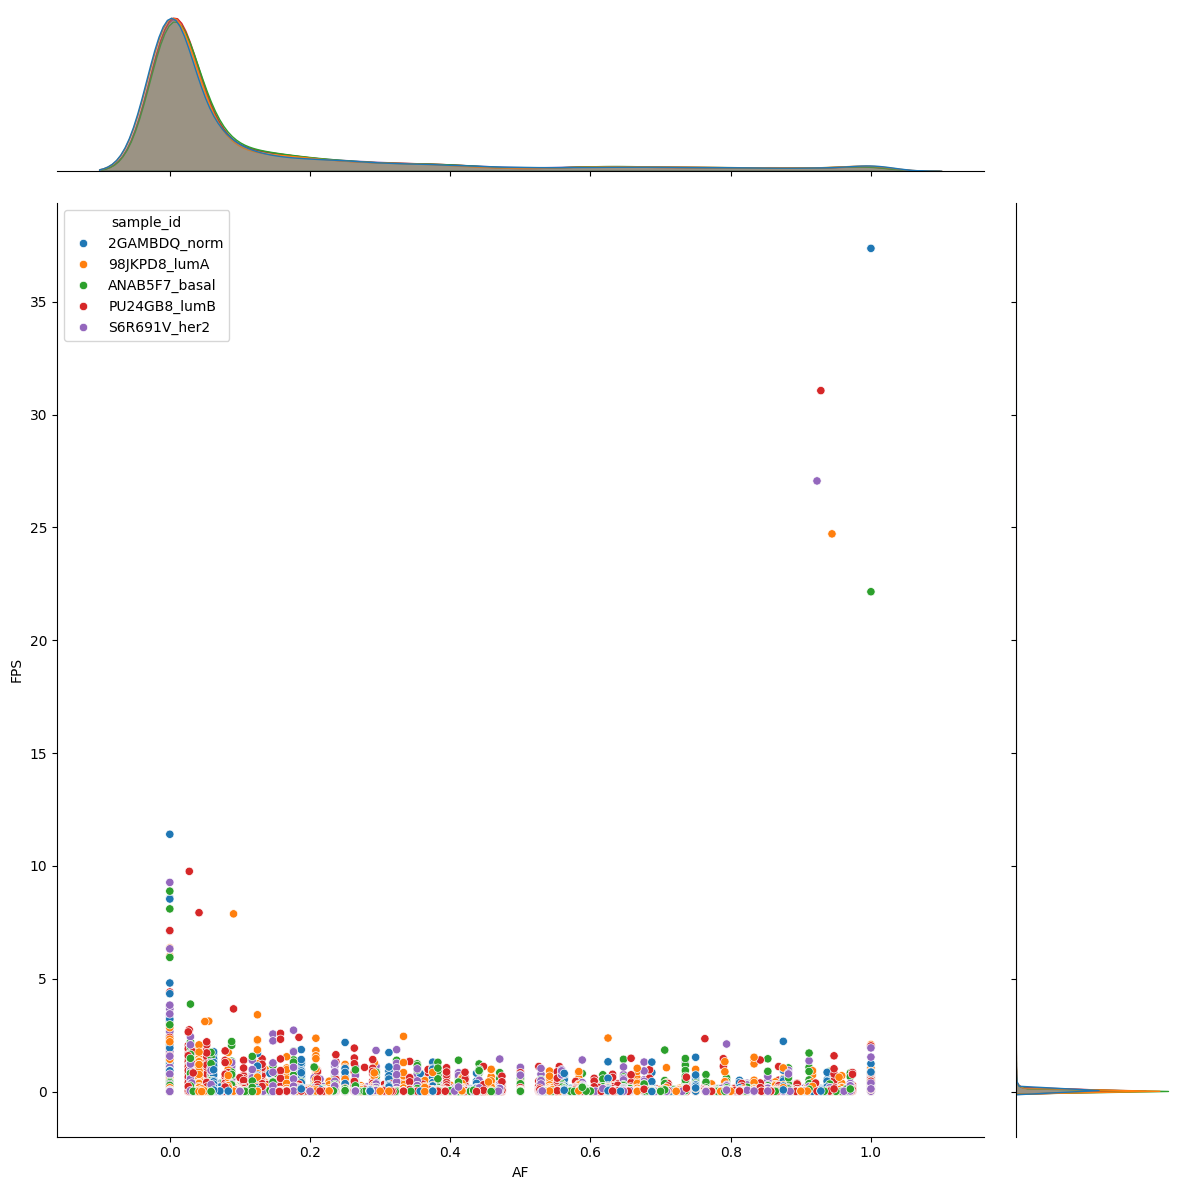

In [7]:
sns.jointplot(x="AF", y="FPS", data=matrix_afps_lpv, hue='sample_id', height=12)
plt.show()
# plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-scatterplots/{motif_id}_afps-jointplot-unfilt.png', dpi=300, bbox_inches='tight')

#### Gist ####

In [7]:
# subset rows that have AF > 0.8 and FPS > 20
matrix_afps_lpv_subset = matrix_afps_lpv[(matrix_afps_lpv['AF'] > 0.8) & (matrix_afps_lpv['FPS'] > 20)]
matrix_afps_lpv_subset


region_id      sample_id        AF       FPS
6365  chr1:160463083-160463097   2GAMBDQ_norm  1.000000  37.36403
6366  chr1:160463083-160463097   98JKPD8_lumA  0.944444  24.71192
6367  chr1:160463083-160463097  ANAB5F7_basal  1.000000  22.14798
6368  chr1:160463083-160463097   PU24GB8_lumB  0.928571  31.06094
6369  chr1:160463083-160463097   S6R691V_her2  0.923077  27.05808

Now, we can plot a stacked bar plot with the bars sorted based on the total AF values across subtypes.

In [8]:
# subset the first 100 rows of the dataframe
# matrix_afps_longpivot_subset = matrix_afps_longpivot.head(100)

# Calculate the cumulative 'AF' for each 'region_id'
cumulative_af = matrix_afps_lpv.groupby('region_id')['AF'].sum().reset_index().rename(columns={'AF': 'cumulative_AF'})

# set the index to 'region_id' and then sort the dataframe by 'AF' in descending order
cumulative_af = cumulative_af.set_index('region_id').sort_values(by='cumulative_AF', ascending=False)
cumulative_af

cumulative_AF
region_id                               
chr12:27554448-27554462              5.0
chr10:103855335-103855349            5.0
chr2:191419355-191419369             5.0
chr11:72821566-72821580              5.0
chr17:79306141-79306155              5.0
...                                  ...
chr8:28092661-28092675               0.0
chr17:81329990-81330004              0.0
chr17:82122442-82122456              0.0
chr17:82281877-82281891              0.0
chr17:82520511-82520525              0.0

[22790 rows x 1 columns]

We can now reorder the original matrix based on the region_id index order in the sorted cumulative_AF dataframe above. 

In [9]:
with pd.option_context('mode.chained_assignment', None):
    # Create a categorical variable with ordered categories
	matrix_afps_lpv['region_id'] = pd.Categorical(matrix_afps_lpv['region_id'], categories=cumulative_af.index.unique(), ordered=True)

	# Sort by the categorical 'region_id'
	matrix_afps_lpv = matrix_afps_lpv.sort_values('region_id')

matrix_afps_lpv

region_id      sample_id   AF      FPS
72847  chr12:27554448-27554462  ANAB5F7_basal  1.0  0.04468
72846  chr12:27554448-27554462   98JKPD8_lumA  1.0  0.01978
72848  chr12:27554448-27554462   PU24GB8_lumB  1.0  0.01380
72849  chr12:27554448-27554462   S6R691V_her2  1.0  0.01760
72845  chr12:27554448-27554462   2GAMBDQ_norm  1.0  0.02175
...                        ...            ...  ...      ...
96178  chr17:82520511-82520525   PU24GB8_lumB  0.0  0.09580
96179  chr17:82520511-82520525   S6R691V_her2  0.0  0.08578
96177  chr17:82520511-82520525  ANAB5F7_basal  0.0  0.08963
96176  chr17:82520511-82520525   98JKPD8_lumA  0.0  0.07097
96175  chr17:82520511-82520525   2GAMBDQ_norm  0.0  0.07703

[113950 rows x 4 columns]

Next, sort the sample_id values per each unique region_id by a specific order. This order is based on the lexicographic order of the sample_id values in the original matrix.

In [10]:
# get unique sample_id values into a list to define a categorical order
datasets = matrix_afps_lpv['sample_id'].unique().tolist()
datasets = sorted(datasets)

# Create a categorical variable with ordered categories
matrix_afps_lpv['sample_id'] = pd.Categorical(matrix_afps_lpv['sample_id'], categories=datasets, ordered=True)

# Sort 'sample_id' within each 'region_id'
matrix_afps_regsorted = matrix_afps_lpv.groupby('region_id', sort=False, observed=False).apply(lambda x: x.sort_values('sample_id')).reset_index(drop=True)

matrix_afps_regsorted

region_id      sample_id   AF      FPS
0       chr12:27554448-27554462   2GAMBDQ_norm  1.0  0.02175
1       chr12:27554448-27554462   98JKPD8_lumA  1.0  0.01978
2       chr12:27554448-27554462  ANAB5F7_basal  1.0  0.04468
3       chr12:27554448-27554462   PU24GB8_lumB  1.0  0.01380
4       chr12:27554448-27554462   S6R691V_her2  1.0  0.01760
...                         ...            ...  ...      ...
113945  chr17:82520511-82520525   2GAMBDQ_norm  0.0  0.07703
113946  chr17:82520511-82520525   98JKPD8_lumA  0.0  0.07097
113947  chr17:82520511-82520525  ANAB5F7_basal  0.0  0.08963
113948  chr17:82520511-82520525   PU24GB8_lumB  0.0  0.09580
113949  chr17:82520511-82520525   S6R691V_her2  0.0  0.08578

[113950 rows x 4 columns]

In [11]:
# truncate the dataframe to the first 5% of region_id values of all unique region_id values
matrix_afps_trunc = matrix_afps_regsorted.head(int(len(matrix_afps_regsorted['region_id'].unique())*0.05)*5)
matrix_afps_trunc

region_id      sample_id        AF      FPS
0     chr12:27554448-27554462   2GAMBDQ_norm  1.000000  0.02175
1     chr12:27554448-27554462   98JKPD8_lumA  1.000000  0.01978
2     chr12:27554448-27554462  ANAB5F7_basal  1.000000  0.04468
3     chr12:27554448-27554462   PU24GB8_lumB  1.000000  0.01380
4     chr12:27554448-27554462   S6R691V_her2  1.000000  0.01760
...                       ...            ...       ...      ...
5690  chr10:27446629-27446643   2GAMBDQ_norm  0.750000  0.02911
5691  chr10:27446629-27446643   98JKPD8_lumA  0.772727  0.02465
5692  chr10:27446629-27446643  ANAB5F7_basal  0.800000  0.01193
5693  chr10:27446629-27446643   PU24GB8_lumB  0.764706  0.01992
5694  chr10:27446629-27446643   S6R691V_her2  0.633333  0.01105

[5695 rows x 4 columns]

In [11]:
matrix_afps_trunc.iloc[0:25]

region_id      sample_id   AF      FPS
0     chr12:27554448-27554462   2GAMBDQ_norm  1.0  0.02175
1     chr12:27554448-27554462   98JKPD8_lumA  1.0  0.01978
2     chr12:27554448-27554462  ANAB5F7_basal  1.0  0.04468
3     chr12:27554448-27554462   PU24GB8_lumB  1.0  0.01380
4     chr12:27554448-27554462   S6R691V_her2  1.0  0.01760
5   chr10:103855335-103855349   2GAMBDQ_norm  1.0  0.11102
6   chr10:103855335-103855349   98JKPD8_lumA  1.0  0.09563
7   chr10:103855335-103855349  ANAB5F7_basal  1.0  0.05680
8   chr10:103855335-103855349   PU24GB8_lumB  1.0  0.07978
9   chr10:103855335-103855349   S6R691V_her2  1.0  0.07891
10   chr2:191419355-191419369   2GAMBDQ_norm  1.0  0.11912
11   chr2:191419355-191419369   98JKPD8_lumA  1.0  0.08692
12   chr2:191419355-191419369  ANAB5F7_basal  1.0  0.07389
13   chr2:191419355-191419369   PU24GB8_lumB  1.0  0.09683
14   chr2:191419355-191419369   S6R691V_her2  1.0  0.07887
15    chr11:72821566-72821580   2GAMBDQ_norm  1.0  0.06848
16    chr11:72821566-72821580   98JKPD8_lumA  1.0  0.07295
17    chr11:72821566-72821580  ANAB5F7_basal  1.0  0.09219
18    chr11:72821566-72821580   PU24GB8_lumB  1.0  0.09467
19    chr11:72821566-72821580   S6R691V_her2  1.0  0.10638
20    chr17:79306141-79306155   2GAMBDQ_norm  1.0  0.02065
21    chr17:79306141-79306155   98JKPD8_lumA  1.0  0.05352
22    chr17:79306141-79306155  ANAB5F7_basal  1.0  0.02698
23    chr17:79306141-79306155   PU24GB8_lumB  1.0  0.02509
24    chr17:79306141-79306155   S6R691V_her2  1.0  0.04095

In [ ]:
fig, ax = plt.subplots(figsize=(9, 12), dpi=300)
# draw line plot of FPS values across region IDs
sns.barplot(x='region_id', y='FPS', hue='sample_id', data=matrix_afps_trunc, ax=ax)
plt.xticks(rotation=90, fontsize=4)
plt.show()

Text(0.5, 0, 'ASCL1_ASCL1_HUMAN.H11MO.0.A motif sites with called variants (22790)')

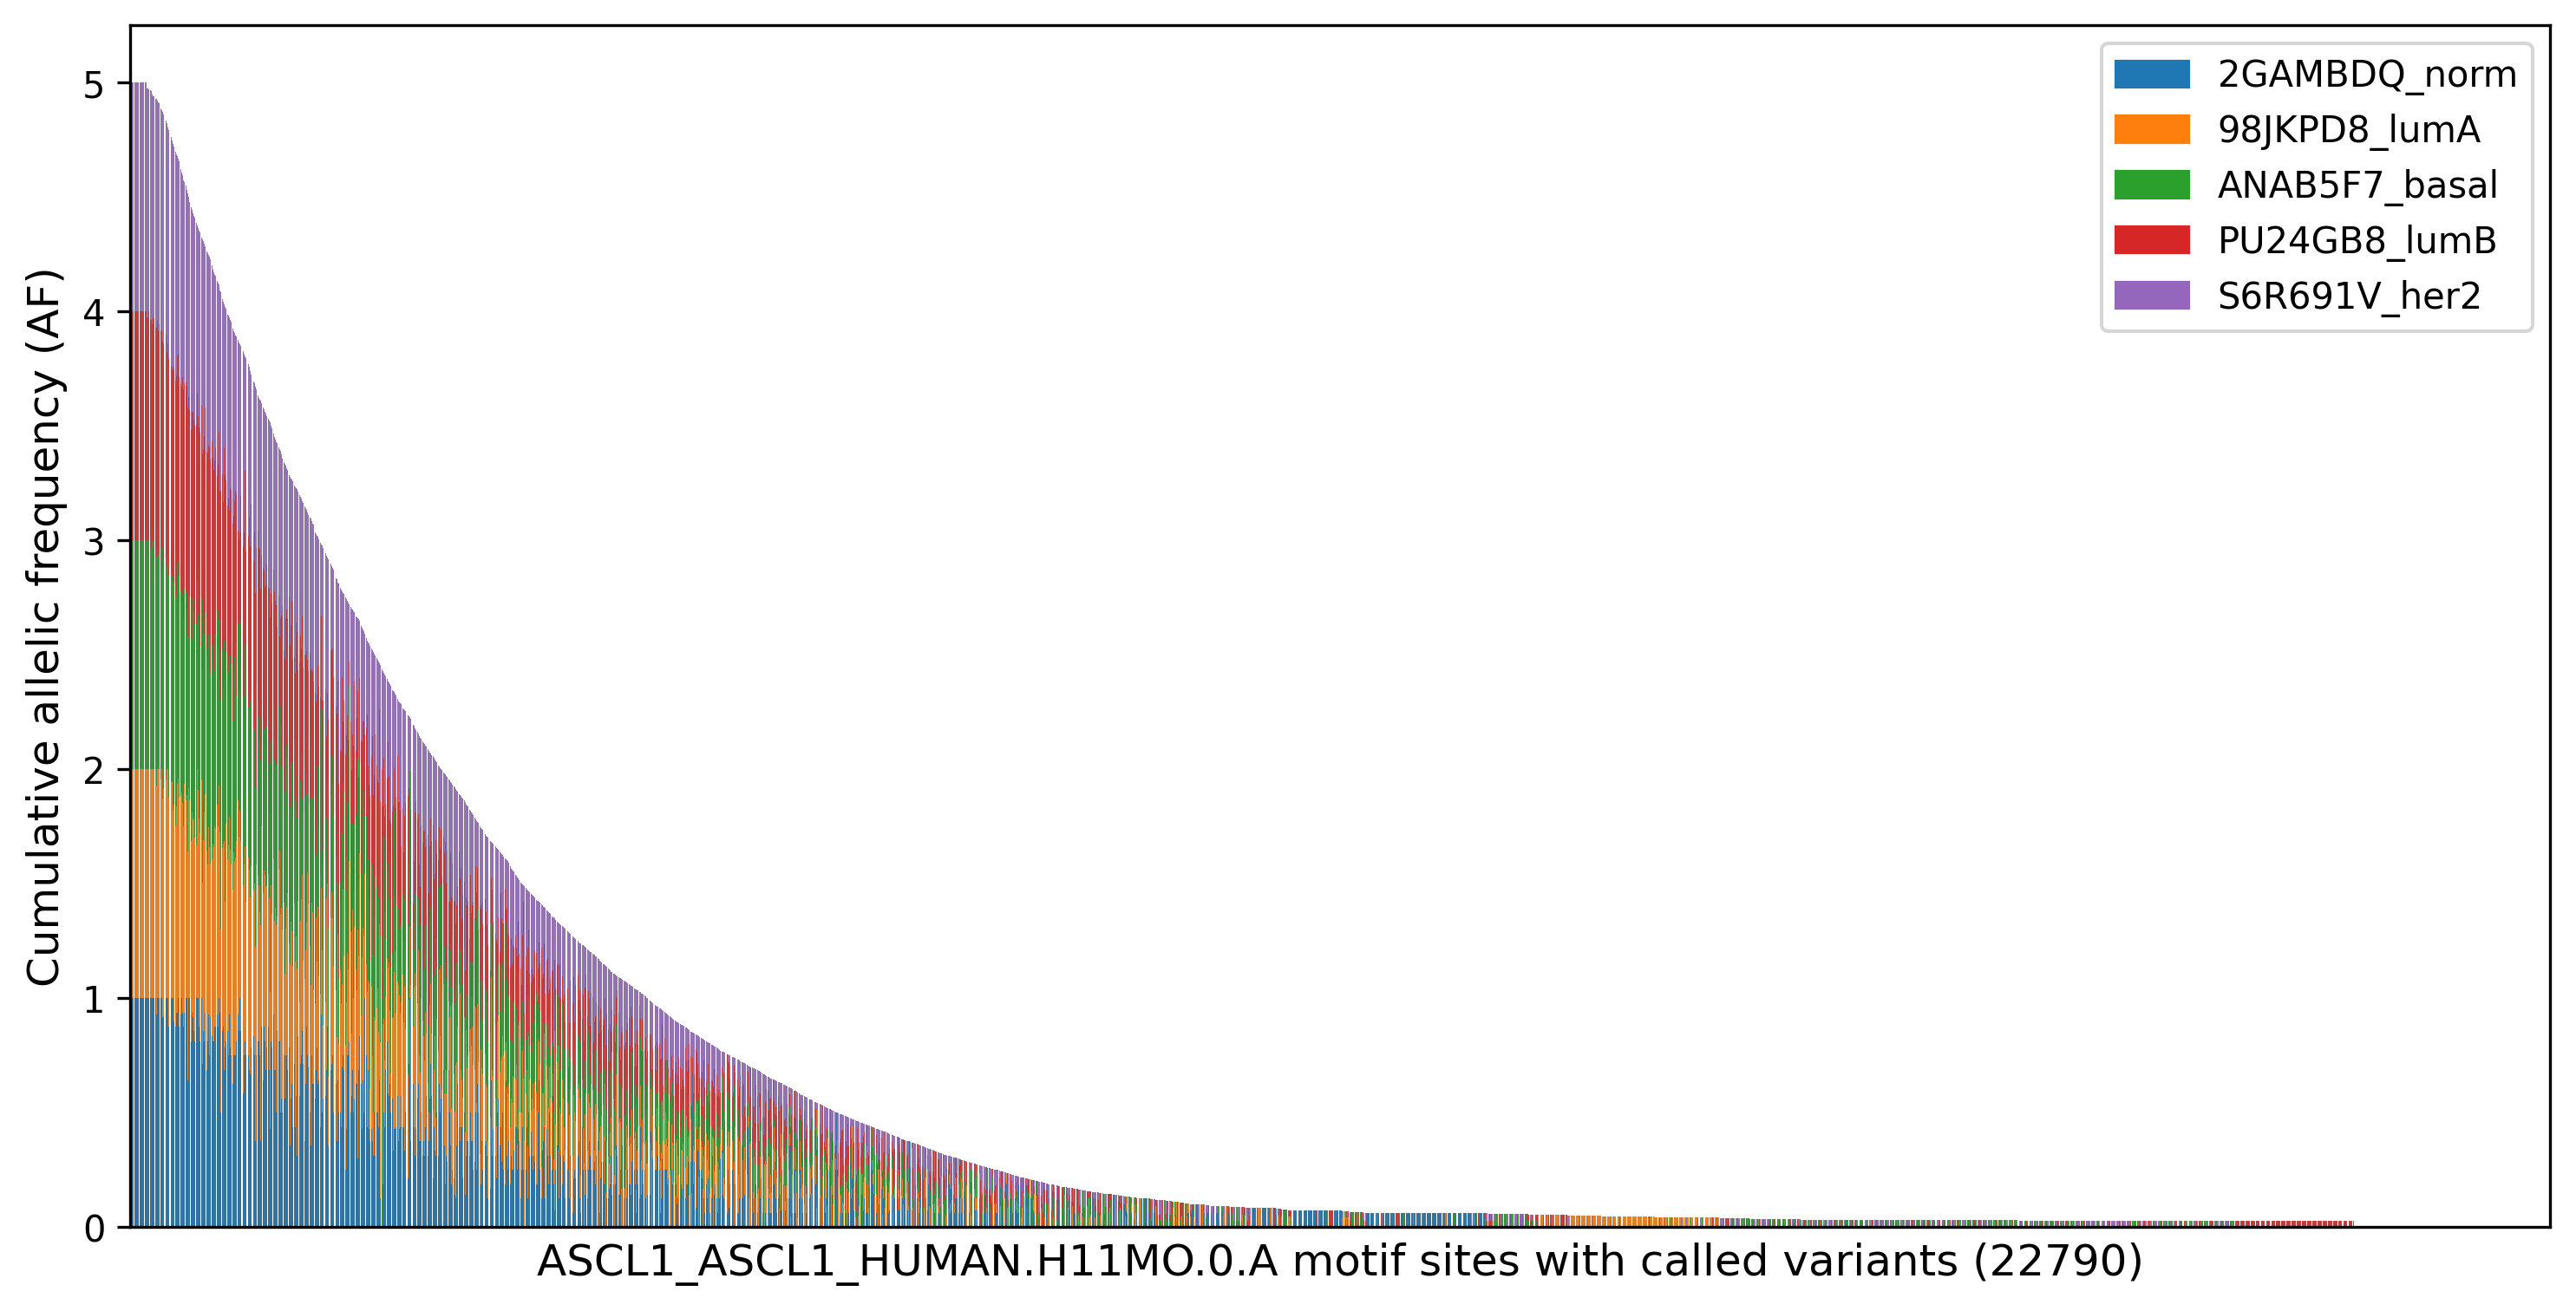

In [12]:
import matplotlib.patches as mpatches

# Get a list of unique 'sample_id' values
sample_ids = matrix_afps_regsorted['sample_id'].unique()

# plot the sorted stacked bar plot
plt.figure(figsize=(12,6), dpi=300)

# Initialize a zero array for the 'bottom' parameter of the bar plot
bottom = np.zeros(len(matrix_afps_regsorted['region_id'].unique()))

# For each 'sample_id'
for i, sample_id in enumerate(sample_ids):
    # Get the 'AF' values for this 'sample_id'
    data = matrix_afps_regsorted[matrix_afps_regsorted['sample_id'] == sample_id]

    # Create a bar plot for this 'sample_id', stacked on top of the previous one
    sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

    # Update 'bottom' for the next 'sample_id'
    bottom += data['AF'].values

# Create a patch for each 'sample_id'
patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# Add the legend to the plot
plt.legend(handles=patches)

plt.xticks([])
plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
plt.xlabel(f'{motif_id} motif sites with called variants ({matrix_afps_regsorted["region_id"].nunique()})', fontsize=12) 
# plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-barplots/{motif_id}_afps-barplot-unfilt.png', dpi=300, bbox_inches='tight')

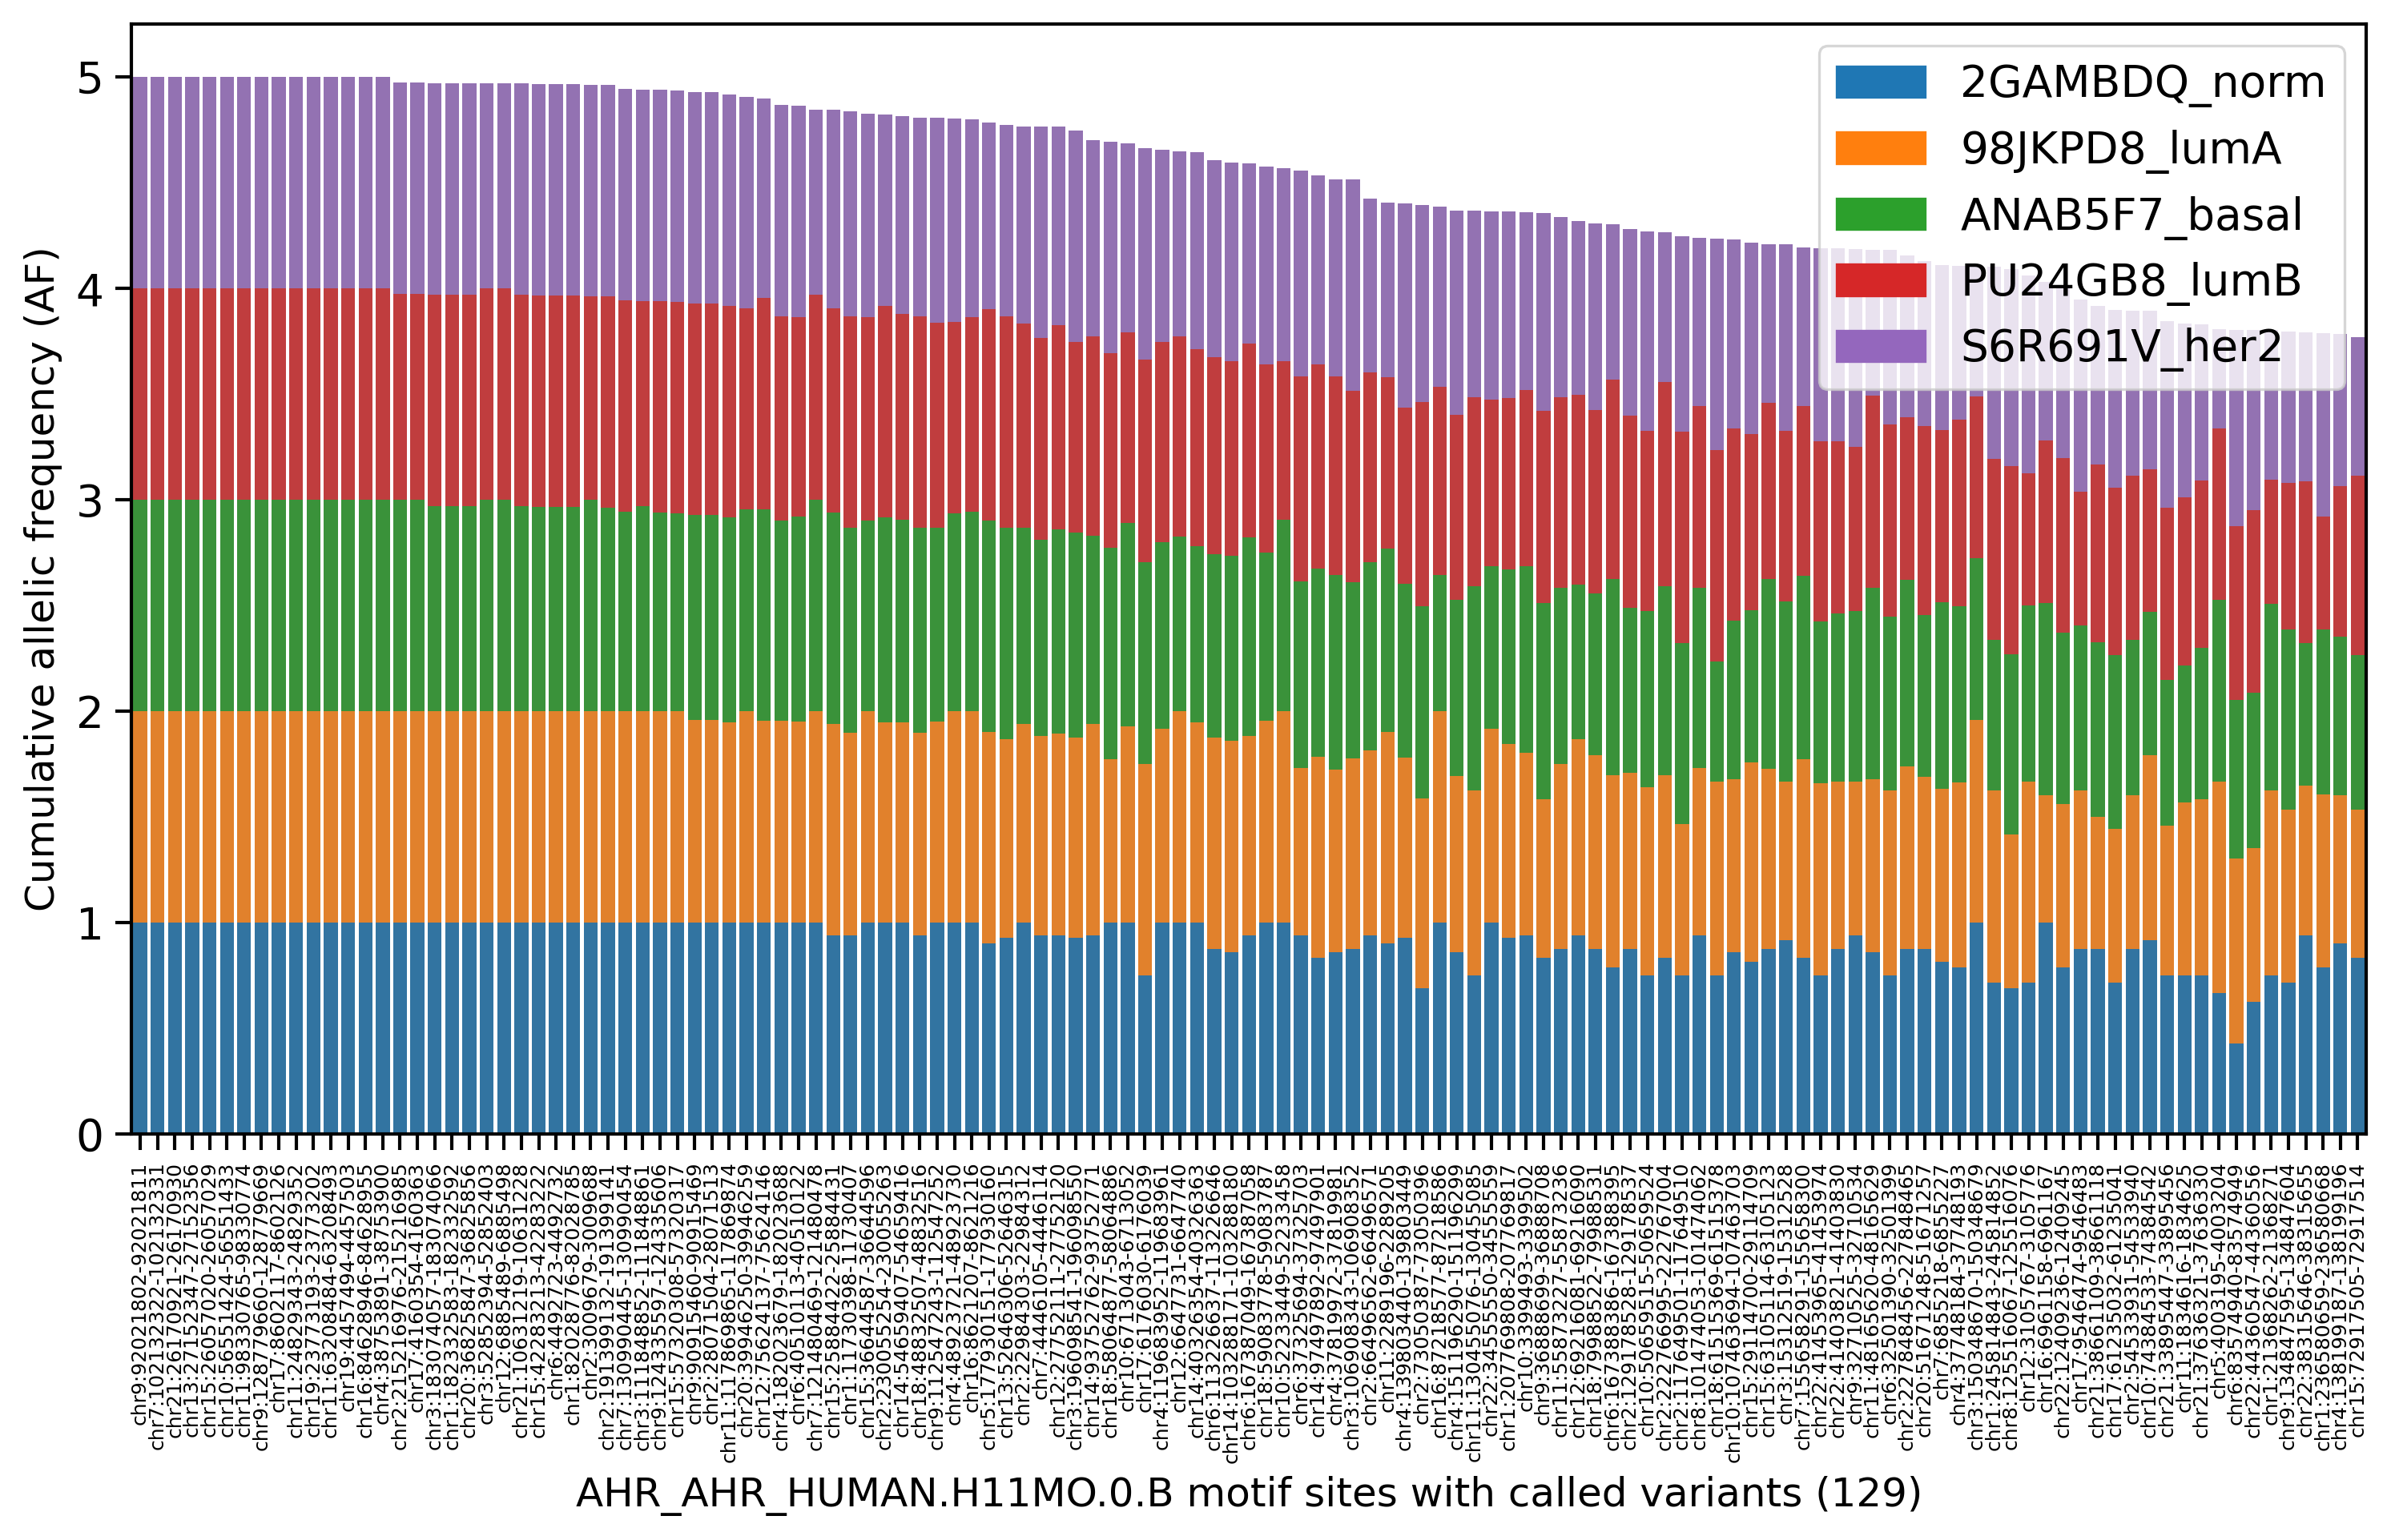

In [43]:
# import matplotlib.patches as mpatches

# # Get a list of unique 'sample_id' values
# sample_ids = test_df['sample_id'].unique()

# # plot the sorted stacked bar plot
# plt.figure(figsize=(12,6), dpi=300)

# # Initialize a zero array for the 'bottom' parameter of the bar plot
# bottom = np.zeros(len(test_df['region_id'].unique()))

# # For each 'sample_id'
# for i, sample_id in enumerate(sample_ids):
#     # Get the 'AF' values for this 'sample_id'
#     data = test_df[test_df['sample_id'] == sample_id]

#     # Create a bar plot for this 'sample_id', stacked on top of the previous one
#     sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

#     # Update 'bottom' for the next 'sample_id'
#     bottom += data['AF'].values

# # Create a patch for each 'sample_id'
# patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# # Add the legend to the plot
# plt.legend(handles=patches)

# plt.xticks(rotation=90, fontsize=6)
# plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
# plt.xlabel(f'{motif_id} motif sites with called variants ({test_df["region_id"].nunique()})', fontsize=12) 
# plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/test.png', dpi=300, bbox_inches='tight')

### Scaling FPS data

(-0.1, 1.1)

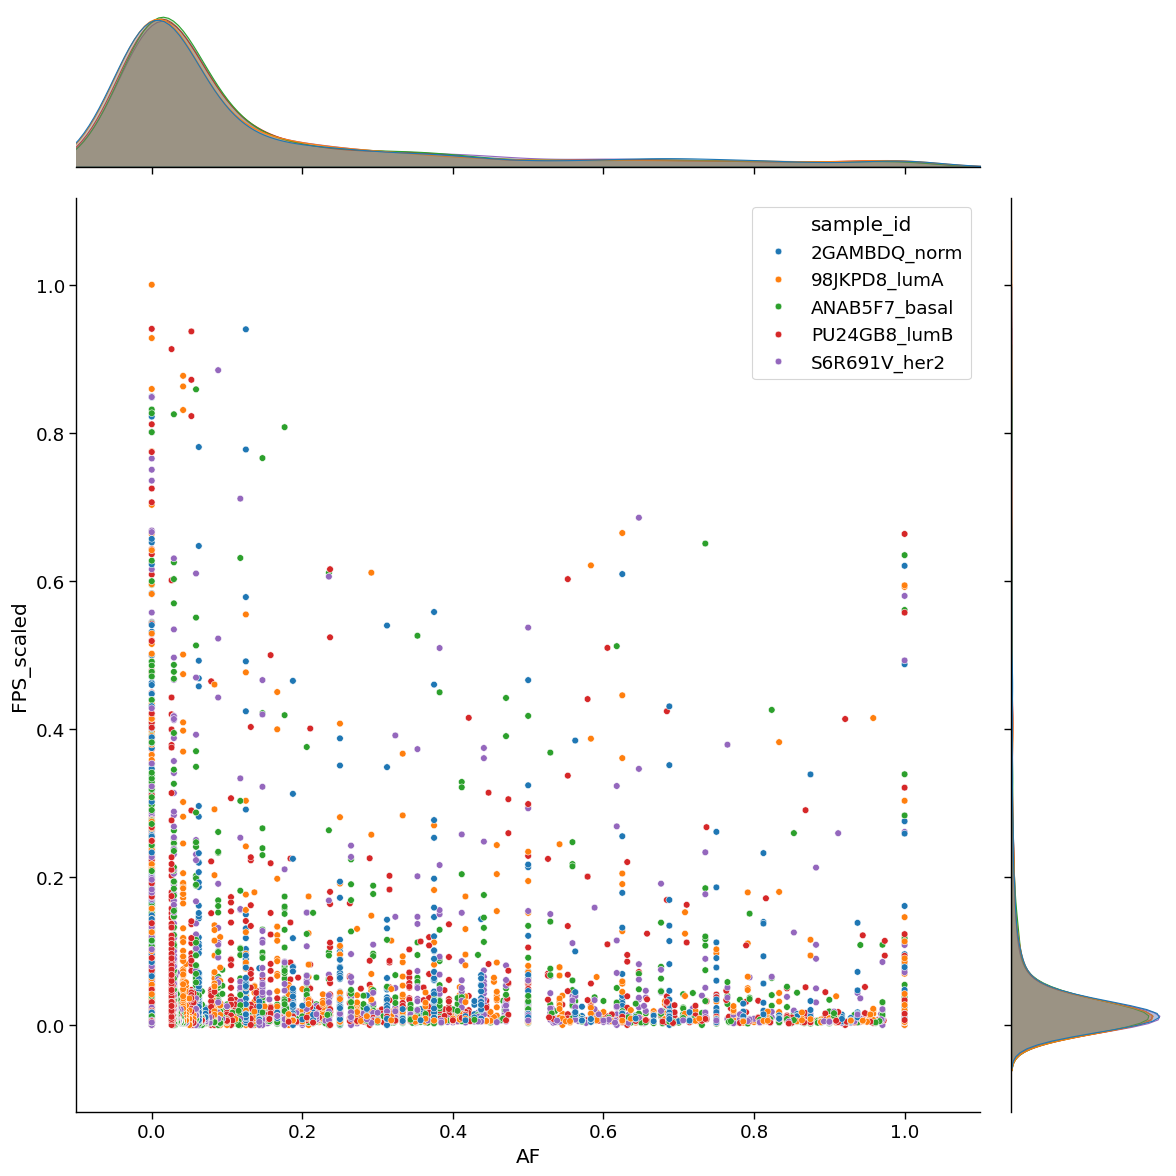

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# scale the AF and FPS values to a range of 0-1
# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the 'FPS' column and transform it
matrix_afps_regsorted['FPS_scaled'] = scaler.fit_transform(matrix_afps_regsorted[['FPS']])

# Create a jointplot of 'AF' and 'FPS'
sns.jointplot(data=matrix_afps_regsorted, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.xlim(-0.1, 1.1)

In [15]:
matrix_afps_regsorted.describe()

AF           FPS    FPS_scaled
count  10925.000000  10925.000000  10925.000000
mean       0.148782      0.094013      0.041402
std        0.249146      0.210717      0.092796
min        0.000000      0.000000      0.000000
25%        0.000000      0.014600      0.006430
50%        0.029412      0.025430      0.011199
75%        0.187500      0.066730      0.029387
max        1.000000      2.270760      1.000000

In [16]:
# filter out outliers using IQR method, but the inverse, where we retain the outliers and remove the inliers
# Calculate Q1, Q3 and IQR for the 'AF' column
Q1 = matrix_afps_regsorted['FPS_scaled'].quantile(0.25)
Q3 = matrix_afps_regsorted['FPS_scaled'].quantile(0.75)
# then filter the inliers
iqr_filtered_df = matrix_afps_regsorted[(matrix_afps_regsorted['AF'] > 0.5) & ((matrix_afps_regsorted['FPS_scaled'] <= Q1) | (matrix_afps_regsorted['FPS_scaled'] >= Q3))]
iqr_filtered_df

region_id      sample_id        AF      FPS  FPS_scaled
5     chr10:121481810-121481820   2GAMBDQ_norm  1.000000  0.01368    0.006024
6     chr10:121481810-121481820   98JKPD8_lumA  1.000000  0.00528    0.002325
7     chr10:121481810-121481820  ANAB5F7_basal  1.000000  0.00407    0.001792
8     chr10:121481810-121481820   PU24GB8_lumB  1.000000  0.00499    0.002198
9     chr10:121481810-121481820   S6R691V_her2  1.000000  0.00464    0.002043
...                         ...            ...       ...      ...         ...
2170    chr12:17082783-17082793   2GAMBDQ_norm  0.571429  0.01385    0.006099
2331      chr16:8812582-8812592   98JKPD8_lumA  0.555556  0.01184    0.005214
2409   chr9:124098227-124098237   S6R691V_her2  0.538462  0.01345    0.005923
2599    chr15:66140414-66140424   S6R691V_her2  0.615385  0.00708    0.003118
2876    chr19:21236237-21236247   98JKPD8_lumA  0.625000  0.01346    0.005928

[621 rows x 5 columns]

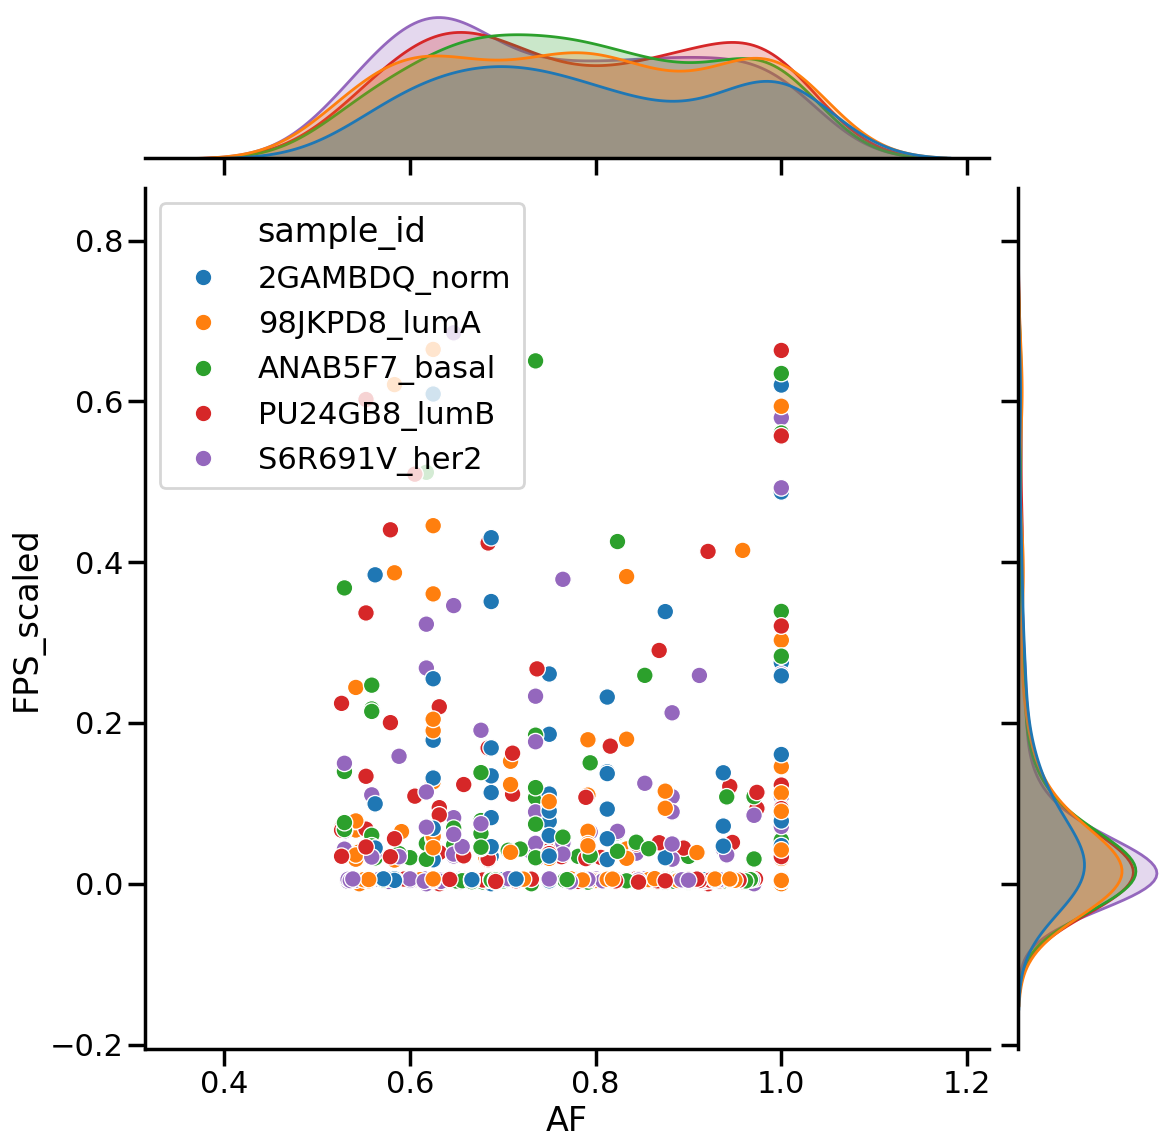

In [17]:
# plot jointplot of the filtered dataframe
sns.set_context("poster", rc={"figure.dpi": 300})
sns.jointplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.show()

In [14]:
filtered_sites_df = iqr_filtered_df.groupby('sample_id', observed=True)['region_id'].nunique().reset_index()
filtered_sites_df['motif_id'] = motif_id
filtered_sites_df

sample_id  region_id                 motif_id
0   2GAMBDQ_norm        109  AHR_AHR_HUMAN.H11MO.0.B
1   98JKPD8_lumA        158  AHR_AHR_HUMAN.H11MO.0.B
2  ANAB5F7_basal        196  AHR_AHR_HUMAN.H11MO.0.B
3   PU24GB8_lumB        152  AHR_AHR_HUMAN.H11MO.0.B
4   S6R691V_her2        171  AHR_AHR_HUMAN.H11MO.0.B

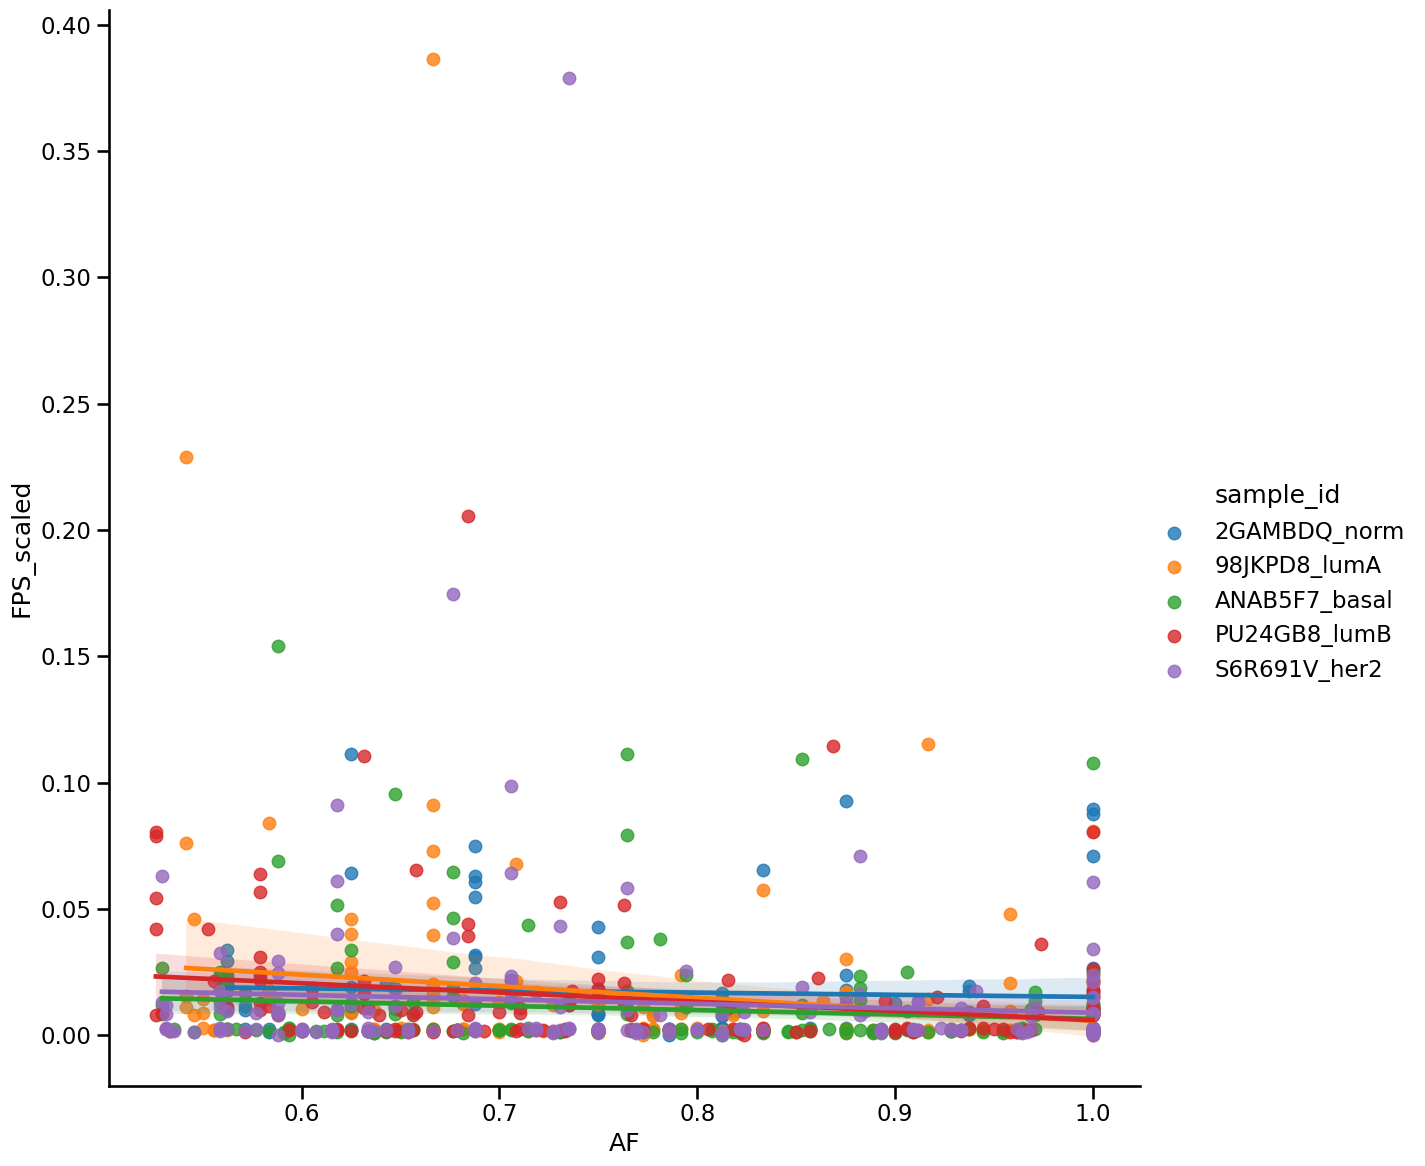

In [37]:
# add trendline to the jointplot
sns.set_context("talk", rc={"figure.dpi": 300})
sns.lmplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', hue='sample_id', height=12)
plt.show()

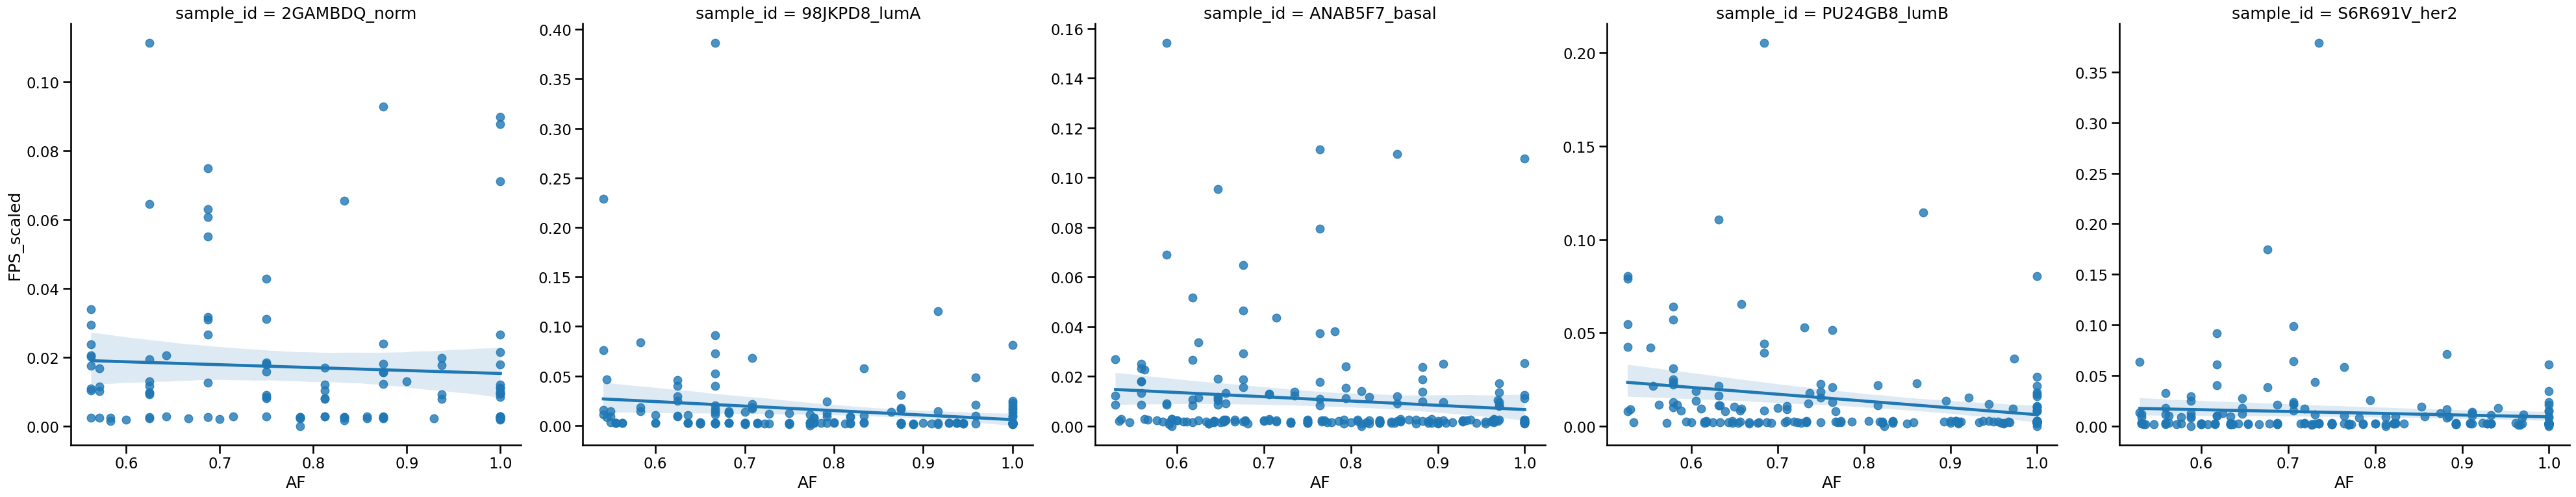

In [34]:
# add trendline to the jointplot
sns.set_context("talk", rc={"figure.dpi": 300})
sns.lmplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', col='sample_id', height=8, facet_kws=dict(sharex=False, sharey=False))
plt.show()

<Axes: xlabel='AF', ylabel='FPS_scaled'>

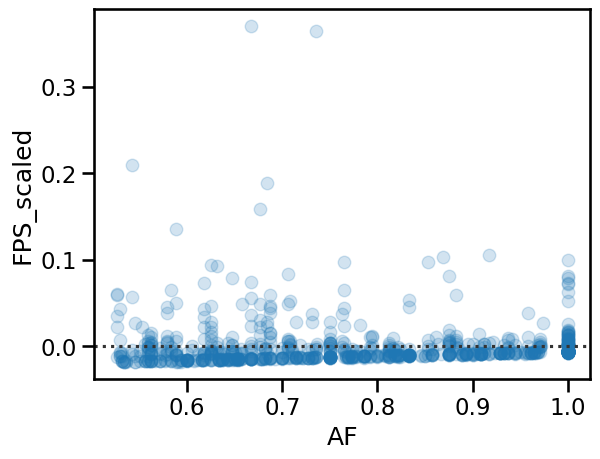

In [35]:
sns.residplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', scatter_kws={'alpha': 0.2})

## ASIDE: Processing `bindetect` FC data

Below is a script to quickly load the bindetect results data into Python.

In [ ]:
import os
directory = '/home/msazizan/hyperspace/gatk-workflow/plotting/raw_inputs/bindetect_results'
df_dict = {}
for file in os.listdir('/home/msazizan/hyperspace/gatk-workflow/plotting/raw_inputs/bindetect_results'):
	if file.endswith('_score.txt'):
		# extract contrast from filename
		contrast = os.path.basename(file).replace('_top_0.05_diff_motif_change_score.txt', '')
		if contrast == 'Basal_vs_Normal-like':
			contrast = 'Basal_vs_Normlike'
		# get full path to file
		file = os.path.join(directory, file)
		# read in fold change data
		fc_df = pd.read_csv(file, sep='\t')
		# rename the column
		cols = list(fc_df.columns)
		cols[1] = 'FC'
		fc_df.columns = cols
		# add contrast column
		fc_df['contrast'] = contrast
		# add df to the empty dictionary
		df_dict[contrast] = fc_df
		print(df_dict[contrast].head())
  
# Initialize merged_df as the first dataframe in the dictionary
merged_df = next(iter(df_dict.values()))

# Loop through the rest of the dataframes and merge them with merged_df
for contrast, df in list(df_dict.items())[1:]:
	merged_df = pd.concat([merged_df, df])

merged_df

In [58]:
# sort merged_df on motif_id
merged_df = merged_df.sort_values('motif_id')
merged_df

motif_id       FC        p-value           contrast
61       ATF3_M08188_2.00  0.12546  8.451810e-160      Basal_vs_LumB
42  CEBPA_HUMAN.H11MO.0.A  0.13299  7.822370e-169      Basal_vs_LumB
20  CEBPA_HUMAN.H11MO.0.A  0.18985  6.282790e-184      Basal_vs_LumA
38  CEBPA_HUMAN.H11MO.0.A  0.17737  3.517980e-181      Basal_vs_Her2
59      CEBPA_M08076_2.00  0.14772  4.270010e-167      Basal_vs_Her2
..                    ...      ...            ...                ...
33     ZNF846_M07707_2.00  0.22118  1.087400e-204  Basal_vs_Normlike
43     ZNF846_M07707_2.00  0.16760  9.129920e-193      Basal_vs_Her2
58     ZNF846_M07707_2.00  0.15603  1.115140e-189      Basal_vs_LumA
40         ZNF93_MA1721.1  0.21248  2.004350e-188  Basal_vs_Normlike
47         ZNF93_MA1721.1  0.16495  1.532830e-177      Basal_vs_Her2

[272 rows x 4 columns]

In [59]:
# filter for motif_id that appears in all possible contrast values
motifs_common = merged_df.groupby('motif_id')['contrast'].nunique().reset_index()
motifs_common

motif_id  contrast
0         ATF3_M08188_2.00         1
1    CEBPA_HUMAN.H11MO.0.A         3
2        CEBPA_M08076_2.00         1
3    CEBPB_HUMAN.H11MO.0.A         4
4        CEBPB_M07830_2.00         4
..                     ...       ...
116     ZNF777_M07703_2.00         4
117     ZNF783_M07757_2.00         2
118     ZNF792_M07660_2.00         2
119     ZNF846_M07707_2.00         3
120         ZNF93_MA1721.1         2

[121 rows x 2 columns]

In [61]:
# filter for contrast == 4
motifs_common = motifs_common[motifs_common['contrast'] == 4]
motifs_common.reset_index(drop=True, inplace=True)
print(len(motifs_common))
motifs_common


20


motif_id  contrast
0   CEBPB_HUMAN.H11MO.0.A         4
1       CEBPB_M07830_2.00         4
2       CEBPB_M07831_2.00         4
3       CEBPB_M07832_2.00         4
4   CEBPD_HUMAN.H11MO.0.C         4
5    E2F2_HUMAN.H11MO.0.B         4
6        E2F4_M07942_2.00         4
7        E2F4_M07943_2.00         4
8    E2F5_HUMAN.H11MO.0.B         4
9        RELA_M07999_2.00         4
10       RELA_M08003_2.00         4
11       RELA_M08006_2.00         4
12       RELA_M08007_2.00         4
13       RELA_M08008_2.00         4
14      TFDP1_M08108_2.00         4
15         TFDP1_MA1122.1         4
16  ZBT14_HUMAN.H11MO.0.C         4
17     ZBTB14_M08387_2.00         4
18      ZFP57_M07756_2.00         4
19     ZNF777_M07703_2.00         4

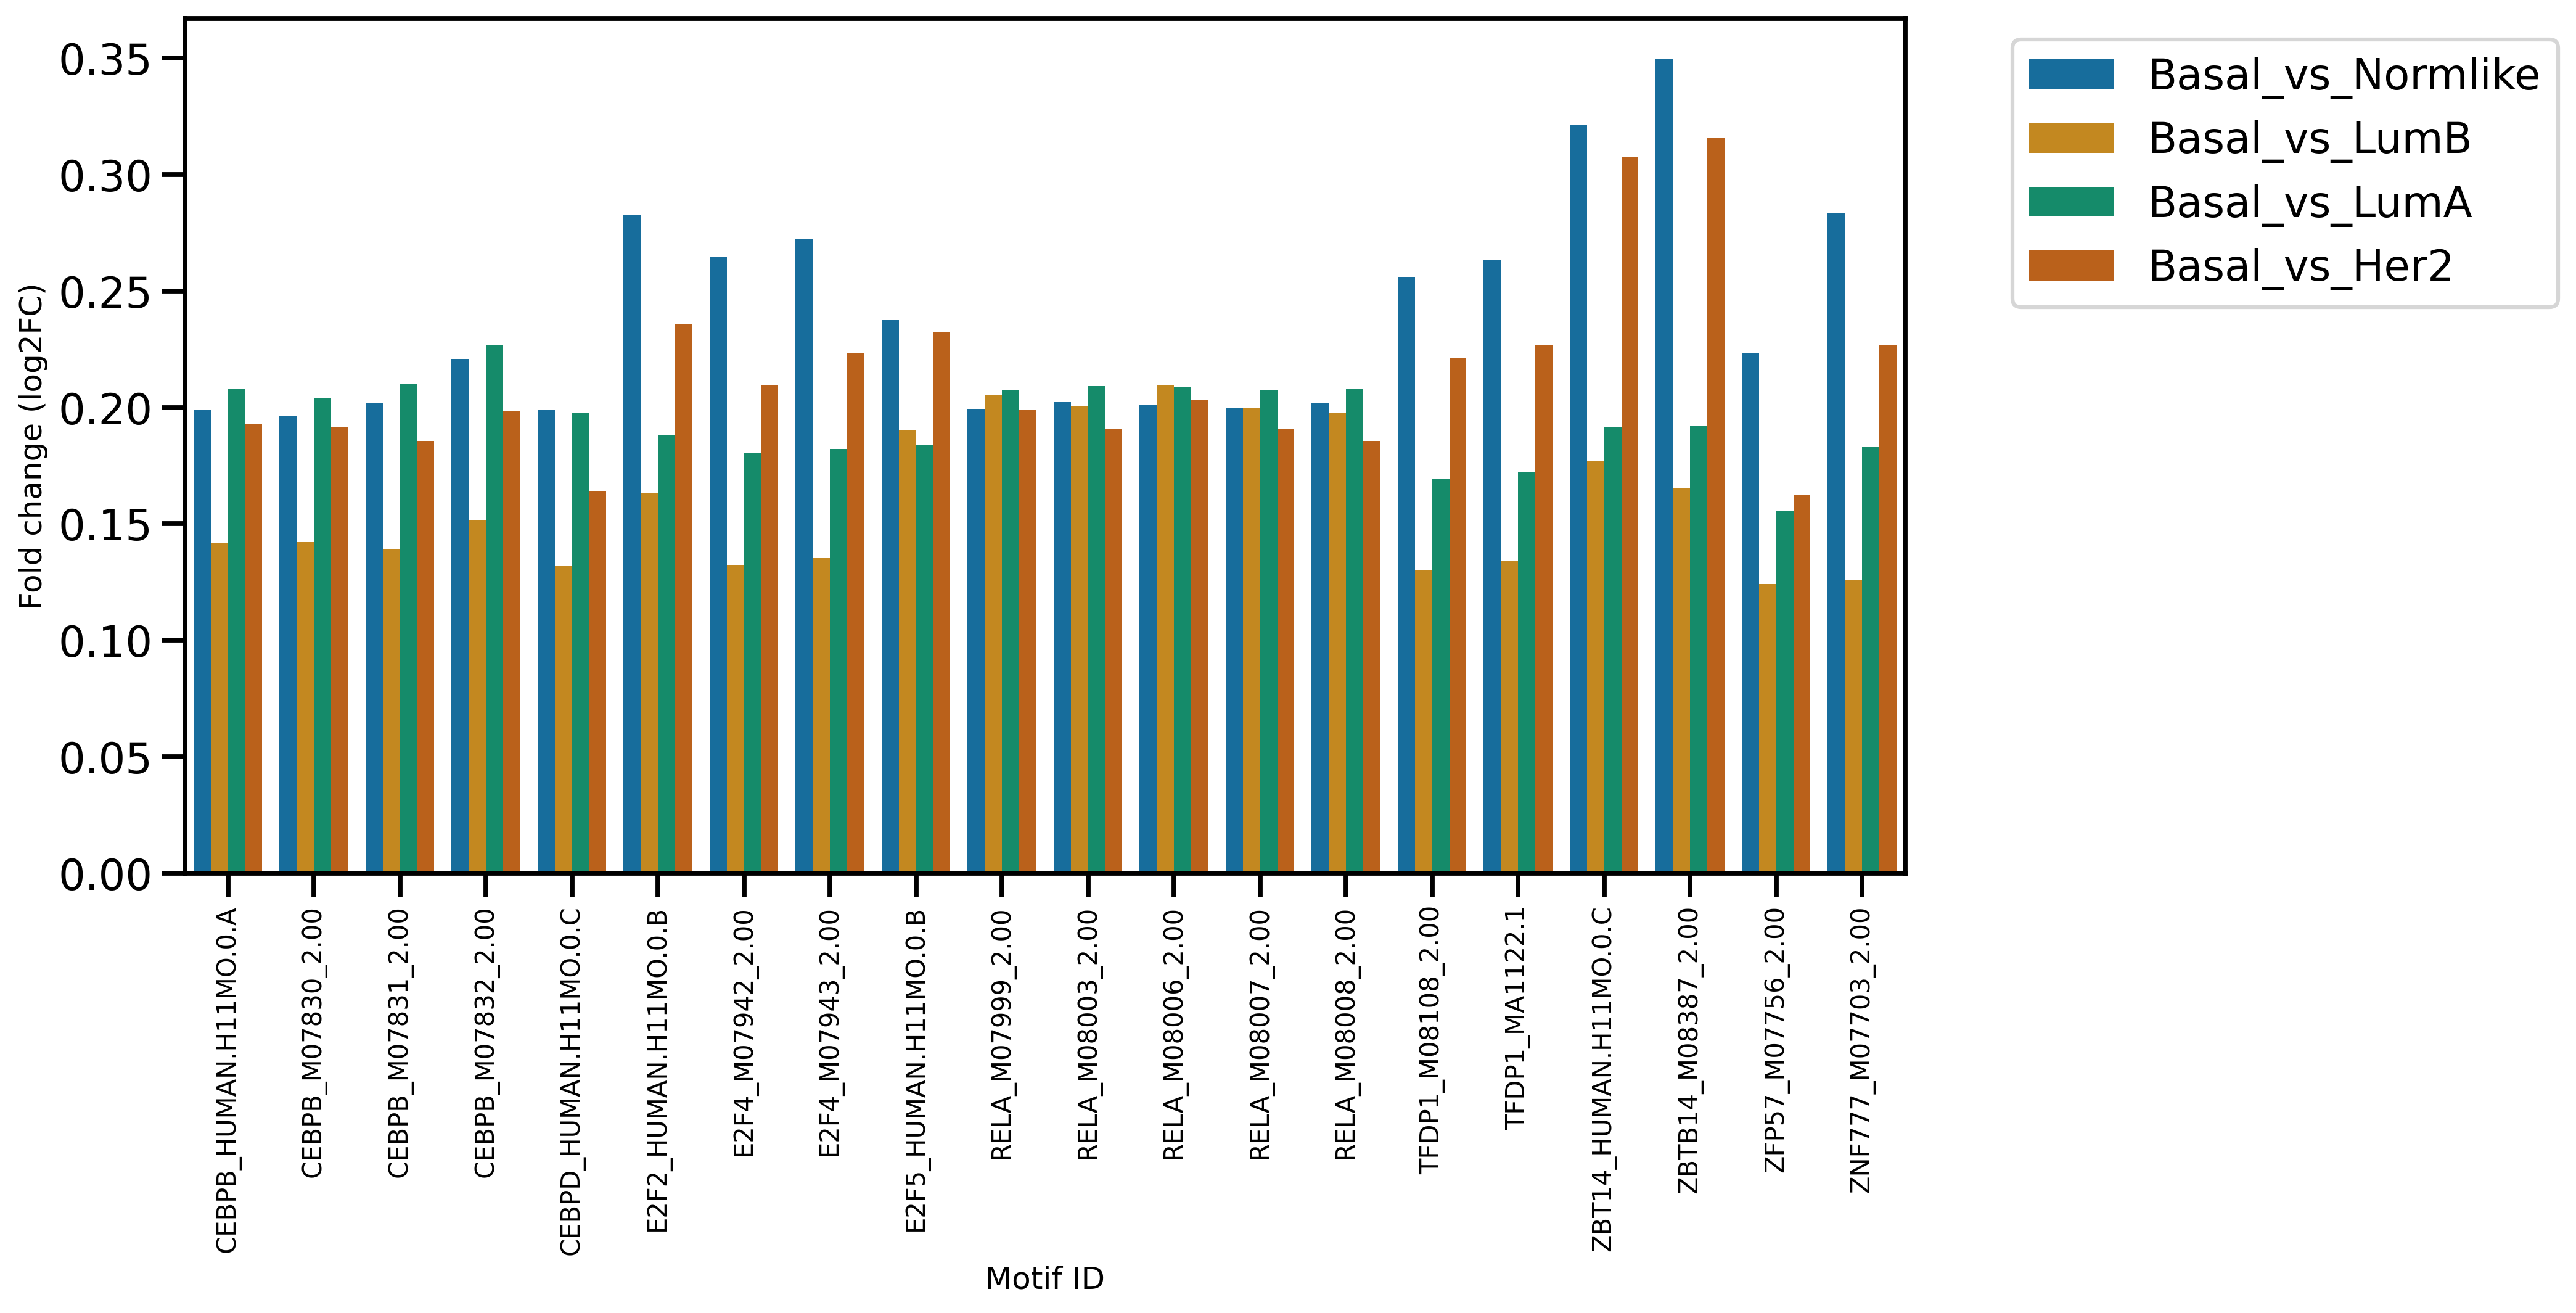

In [71]:
# plot FC values for each contrast
plt.figure(figsize=(12,6), dpi=300)
sns.barplot(data=merged_df[merged_df['motif_id'].isin(motifs_common['motif_id'])], x='motif_id', y='FC', hue='contrast', palette='colorblind')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Motif ID', fontsize=12)
plt.ylabel('Fold change (log2FC)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Calculating the Variance of the AF and FPS values 

It would be quite interesting to see if for each variant site per motif, the variance of the AF and FPS values are correlated.

I.e. if a variant site has a high variance in AF values, does it also have a high variance in FPS values?

In [79]:
# import the data
filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'E2F5_E2F5_HUMAN.H11MO.0.B'

In [80]:
matrix_afps

Chromosome      Start        End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0          chr1     905473     905483           0.10260            0.12218   
1          chr1     925405     925415           0.09540            0.03670   
2          chr1    1020750    1020760           0.09749            0.09080   
3          chr1    1130413    1130423           0.11471            0.04786   
4          chr1    1225277    1225287           0.01792            0.04624   
...         ...        ...        ...               ...                ...   
2180       chrX  118300271  118300281           0.00703            0.00985   
2181       chrX  119211181  119211191           0.01215            0.01187   
2182       chrX  139342109  139342119           0.02016            0.00831   
2183       chrX  147508113  147508123           0.00810            0.00633   
2184       chrX  150849074  150849084           0.34392            0.07363   

      S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0              0.13921           0.12024           0.14062   
1              0.09011           0.05082           0.05586   
2              0.07864           0.10880           0.08458   
3              0.11338           0.14384           0.15151   
4              0.02729           0.01957           0.02657   
...                ...               ...               ...   
2180           0.00556           0.00611           0.00910   
2181           0.01025           0.01366           0.01454   
2182           0.02155           0.01655           0.02160   
2183           0.00697           0.00629           0.01465   
2184           0.35995           0.24735           0.20522   

      2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                          NaN                     NaN  ...         0.000000   
1                     925409.0                       T  ...         0.730769   
2                    1020755.0                       C  ...         0.000000   
3                    1130420.0                       C  ...         0.062500   
4                    1225285.0                       G  ...         0.062500   
...                        ...                     ...  ...              ...   
2180                       NaN                     NaN  ...         0.000000   
2181                       NaN                     NaN  ...         0.093750   
2182                       NaN                     NaN  ...         0.000000   
2183                       NaN                     NaN  ...         0.045455   
2184               150849077.0                       C  ...         0.600000   

      PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                     905474.0                        G   
1                     925409.0                        T   
2                          NaN                      NaN   
3                    1130420.0                        C   
4                    1225285.0                        G   
...                        ...                      ...   
2180               118300279.0                        G   
2181                       NaN                      NaN   
2182                       NaN                      NaN   
2183                       NaN                      NaN   
2184               150849077.0                        C   

     PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                          A        0.027778                       NaN   
1                          C        0.769231                  925409.0   
2                        NaN        0.000000                       NaN   
3                          T        0.131579                 1130420.0   
4                          A        0.078947                 1225285.0   
...                      ...             ...                       ...   
2180                       A        0.071429                       NaN   
2181                     NaN        0.000000               11

In [14]:
# convert to long format
matrix_afps_long = matrix_afps.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
matrix_afps_long[['sample_id', 'type']] = matrix_afps_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
matrix_afps_long = matrix_afps_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
matrix_afps_lpv = matrix_afps_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
matrix_afps_lpv = matrix_afps_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
matrix_afps_lpv = matrix_afps_lpv.reindex(index=index_natsorted(matrix_afps_lpv['region_id']))
matrix_afps_lpv = matrix_afps_lpv.reset_index(drop=True)
matrix_afps_lpv

region_id      sample_id   AF      FPS
0       chr12:27554448-27554462   2GAMBDQ_norm  1.0  0.02175
1       chr12:27554448-27554462   98JKPD8_lumA  1.0  0.01978
2       chr12:27554448-27554462  ANAB5F7_basal  1.0  0.04468
3       chr12:27554448-27554462   PU24GB8_lumB  1.0  0.01380
4       chr12:27554448-27554462   S6R691V_her2  1.0  0.01760
...                         ...            ...  ...      ...
113945  chr17:82520511-82520525   2GAMBDQ_norm  0.0  0.07703
113946  chr17:82520511-82520525   98JKPD8_lumA  0.0  0.07097
113947  chr17:82520511-82520525  ANAB5F7_basal  0.0  0.08963
113948  chr17:82520511-82520525   PU24GB8_lumB  0.0  0.09580
113949  chr17:82520511-82520525   S6R691V_her2  0.0  0.08578

[113950 rows x 4 columns]

In [66]:
# extract fps columns
fps_df = matrix_afps.filter(regex='_fps$|_id$')
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  \
0               0.00000            0.00000           0.00000   
1               0.00000            0.00000           0.00000   
2               0.00000            0.00000           0.00000   
3               0.03115            0.03309           0.03269   
4               0.03365            0.02102           0.03896   
...                 ...                ...               ...   
22785           0.02153            0.02309           0.02438   
22786           0.00000            0.00000           0.00000   
22787           0.00000            0.00000           0.00000   
22788           0.00000            0.00000           0.00000   
22789           0.00175            0.00087           0.00173   

       PU24GB8_lumB_fps  2GAMBDQ_norm_fps               region_id  
0               0.00000           0.00000      chr1:183695-183709  
1               0.00000           0.00000      chr1:268000-268014  
2               0.00000           0.00000      chr1:779045-779059  
3               0.03930           0.03563      chr1:818731-818745  
4               0.03048           0.03007      chr1:898815-898829  
...                 ...               ...                     ...  
22785           0.02204           0.03428  chrY:10098815-10098829  
22786           0.00000           0.00000  chrY:11107186-11107200  
22787           0.00000           0.00000  chrY:11107235-11107249  
22788           0.00000           0.00000  chrY:11116171-11116185  
22789           0.00394           0.01641  chrY:14882875-14882889  

[22790 rows x 6 columns]

In [67]:
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  \
region_id                                                                       
chr1:183695-183709               0.00000            0.00000           0.00000   
chr1:268000-268014               0.00000            0.00000           0.00000   
chr1:779045-779059               0.00000            0.00000           0.00000   
chr1:818731-818745               0.03115            0.03309           0.03269   
chr1:898815-898829               0.03365            0.02102           0.03896   
...                                  ...                ...               ...   
chrY:10098815-10098829           0.02153            0.02309           0.02438   
chrY:11107186-11107200           0.00000            0.00000           0.00000   
chrY:11107235-11107249           0.00000            0.00000           0.00000   
chrY:11116171-11116185           0.00000            0.00000           0.00000   
chrY:14882875-14882889           0.00175            0.00087           0.00173   

                        PU24GB8_lumB_fps  2GAMBDQ_norm_fps   fps_var  
region_id                                                             
chr1:183695-183709               0.00000           0.00000  0.000000  
chr1:268000-268014               0.00000           0.00000  0.000000  
chr1:779045-779059               0.00000           0.00000  0.000000  
chr1:818731-818745               0.03930           0.03563  0.000010  
chr1:898815-898829               0.03048           0.03007  0.000043  
...                                  ...               ...       ...  
chrY:10098815-10098829           0.02204           0.03428  0.000028  
chrY:11107186-11107200           0.00000           0.00000  0.000000  
chrY:11107235-11107249           0.00000           0.00000  0.000000  
chrY:11116171-11116185           0.00000           0.00000  0.000000  
chrY:14882875-14882889           0.00394           0.01641  0.000042  

[22790 rows x 6 columns]

In [68]:
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_cv'
fps_df['fps_cv'] = fps_df.drop(columns=['fps_var']).std(axis=1) / fps_df.drop(columns=['fps_var']).mean(axis=1) * 100
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  \
region_id                                                                       
chr1:183695-183709               0.00000            0.00000           0.00000   
chr1:268000-268014               0.00000            0.00000           0.00000   
chr1:779045-779059               0.00000            0.00000           0.00000   
chr1:818731-818745               0.03115            0.03309           0.03269   
chr1:898815-898829               0.03365            0.02102           0.03896   
...                                  ...                ...               ...   
chrY:10098815-10098829           0.02153            0.02309           0.02438   
chrY:11107186-11107200           0.00000            0.00000           0.00000   
chrY:11107235-11107249           0.00000            0.00000           0.00000   
chrY:11116171-11116185           0.00000            0.00000           0.00000   
chrY:14882875-14882889           0.00175            0.00087           0.00173   

                        PU24GB8_lumB_fps  2GAMBDQ_norm_fps   fps_var  \
region_id                                                              
chr1:183695-183709               0.00000           0.00000  0.000000   
chr1:268000-268014               0.00000           0.00000  0.000000   
chr1:779045-779059               0.00000           0.00000  0.000000   
chr1:818731-818745               0.03930           0.03563  0.000010   
chr1:898815-898829               0.03048           0.03007  0.000043   
...                                  ...               ...       ...   
chrY:10098815-10098829           0.02204           0.03428  0.000028   
chrY:11107186-11107200           0.00000           0.00000  0.000000   
chrY:11107235-11107249           0.00000           0.00000  0.000000   
chrY:11116171-11116185           0.00000           0.00000  0.000000   
chrY:14882875-14882889           0.00394           0.01641  0.000042   

                            fps_cv  
region_id                           
chr1:183695-183709             NaN  
chr1:268000-268014             NaN  
chr1:779045-779059             NaN  
chr1:818731-818745        9.282780  
chr1:898815-898829       21.202710  
...                            ...  
chrY:10098815-10098829   21.011151  
chrY:11107186-11107200         NaN  
chrY:11107235-11107249         NaN  
chrY:11116171-11116185         NaN  
chrY:14882875-14882889  131.814644  

[22790 rows x 7 columns]

In [69]:
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_qcd'
fps_df['fps_qcd'] = (fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.75, axis=1) - fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.25, axis=1)) / (fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.75, axis=1) + fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.25, axis=1))
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  \
region_id                                                                       
chr1:183695-183709               0.00000            0.00000           0.00000   
chr1:268000-268014               0.00000            0.00000           0.00000   
chr1:779045-779059               0.00000            0.00000           0.00000   
chr1:818731-818745               0.03115            0.03309           0.03269   
chr1:898815-898829               0.03365            0.02102           0.03896   
...                                  ...                ...               ...   
chrY:10098815-10098829           0.02153            0.02309           0.02438   
chrY:11107186-11107200           0.00000            0.00000           0.00000   
chrY:11107235-11107249           0.00000            0.00000           0.00000   
chrY:11116171-11116185           0.00000            0.00000           0.00000   
chrY:14882875-14882889           0.00175            0.00087           0.00173   

                        PU24GB8_lumB_fps  2GAMBDQ_norm_fps   fps_var  \
region_id                                                              
chr1:183695-183709               0.00000           0.00000  0.000000   
chr1:268000-268014               0.00000           0.00000  0.000000   
chr1:779045-779059               0.00000           0.00000  0.000000   
chr1:818731-818745               0.03930           0.03563  0.000010   
chr1:898815-898829               0.03048           0.03007  0.000043   
...                                  ...               ...       ...   
chrY:10098815-10098829           0.02204           0.03428  0.000028   
chrY:11107186-11107200           0.00000           0.00000  0.000000   
chrY:11107235-11107249           0.00000           0.00000  0.000000   
chrY:11116171-11116185           0.00000           0.00000  0.000000   
chrY:14882875-14882889           0.00394           0.01641  0.000042   

                            fps_cv   fps_qcd  
region_id                                     
chr1:183695-183709             NaN       NaN  
chr1:268000-268014             NaN       NaN  
chr1:779045-779059             NaN       NaN  
chr1:818731-818745        9.282780  0.043033  
chr1:898815-898829       21.202710  0.056183  
...                            ...       ...  
chrY:10098815-10098829   21.011151  0.050409  
chrY:11107186-11107200         NaN       NaN  
chrY:11107235-11107249         NaN       NaN  
chrY:11116171-11116185         NaN       NaN  
chrY:14882875-14882889  131.814644  0.389771  

[22790 rows x 8 columns]

In [70]:
# subset for just the fps_var column
fps_measures_df = fps_df[['fps_var', 'fps_cv', 'fps_qcd']]
fps_measures_df

fps_var      fps_cv   fps_qcd
region_id                                             
chr1:183695-183709      0.000000         NaN       NaN
chr1:268000-268014      0.000000         NaN       NaN
chr1:779045-779059      0.000000         NaN       NaN
chr1:818731-818745      0.000010    9.282780  0.043033
chr1:898815-898829      0.000043   21.202710  0.056183
...                          ...         ...       ...
chrY:10098815-10098829  0.000028   21.011151  0.050409
chrY:11107186-11107200  0.000000         NaN       NaN
chrY:11107235-11107249  0.000000         NaN       NaN
chrY:11116171-11116185  0.000000         NaN       NaN
chrY:14882875-14882889  0.000042  131.814644  0.389771

[22790 rows x 3 columns]

In [71]:
matrix_afps_regsorted

region_id      sample_id        AF       FPS
1780   chr1:160463083-160463097   2GAMBDQ_norm  1.000000  37.36403
1781   chr1:160463083-160463097   98JKPD8_lumA  0.944444  24.71192
1782   chr1:160463083-160463097  ANAB5F7_basal  1.000000  22.14798
1783   chr1:160463083-160463097   PU24GB8_lumB  0.928571  31.06094
1784   chr1:160463083-160463097   S6R691V_her2  0.923077  27.05808
...                         ...            ...       ...       ...
11936        chrX:276769-276783   98JKPD8_lumA  0.625000   0.00000
11937        chrX:276769-276783  ANAB5F7_basal  0.411765   0.00000
11938        chrX:276769-276783   PU24GB8_lumB  0.605263   0.00000
11939        chrX:276769-276783   S6R691V_her2  0.529412   0.00000
11935        chrX:276769-276783   2GAMBDQ_norm  0.250000   0.00000

[113950 rows x 4 columns]

In [74]:
# merge fps_measures_df with matrix_afps_regsorted on index and region_id
matrix_afps_long = matrix_afps_regsorted.set_index('region_id')
matrix_afps_merged = matrix_afps_long.merge(fps_measures_df, left_index=True, right_index=True)
# sort naturally by region_id
matrix_afps_merged = matrix_afps_merged.reset_index().reindex(index=index_natsorted(matrix_afps_merged.index))

matrix_afps_merged

region_id      sample_id        AF      FPS   fps_var  \
46070       chr1:183695-183709  ANAB5F7_basal  0.058824  0.00000  0.000000   
46071       chr1:183695-183709   98JKPD8_lumA  0.000000  0.00000  0.000000   
46072       chr1:183695-183709   PU24GB8_lumB  0.000000  0.00000  0.000000   
46073       chr1:183695-183709   S6R691V_her2  0.000000  0.00000  0.000000   
46074       chr1:183695-183709   2GAMBDQ_norm  0.000000  0.00000  0.000000   
...                        ...            ...       ...      ...       ...   
113945  chrY:14882875-14882889   2GAMBDQ_norm  0.000000  0.01641  0.000042   
113946  chrY:14882875-14882889   98JKPD8_lumA  0.000000  0.00175  0.000042   
113947  chrY:14882875-14882889  ANAB5F7_basal  0.000000  0.00087  0.000042   
113948  chrY:14882875-14882889   PU24GB8_lumB  0.000000  0.00394  0.000042   
113949  chrY:14882875-14882889   S6R691V_her2  0.000000  0.00173  0.000042   

            fps_cv   fps_qcd  
46070          NaN       NaN  
46071          NaN       NaN  
46072          NaN       NaN  
46073          NaN       NaN  
46074          NaN       NaN  
...            ...       ...  
113945  131.814644  0.389771  
113946  131.814644  0.389771  
113947  131.814644  0.389771  
113948  131.814644  0.389771  
113949  131.814644  0.389771  

[113950 rows x 7 columns]

From here, it makes sense to filter out variant sites that has fps_cv or fps_qcd values == NaN. This means that there is no evidence of footprinting at all at these sites. 

In [75]:
# filter out unique region_id rows that have fps_cv == NaN OR fps_qcd == NaN
matrix_afps_merged_filt = matrix_afps_merged[~(matrix_afps_merged['fps_cv'].isna() | matrix_afps_merged['fps_qcd'].isna())]
matrix_afps_merged_filt

region_id      sample_id       AF      FPS   fps_var  \
52200       chr1:818731-818745   98JKPD8_lumA  0.12500  0.03115  0.000010   
52201       chr1:818731-818745   2GAMBDQ_norm  0.00000  0.03563  0.000010   
52202       chr1:818731-818745  ANAB5F7_basal  0.00000  0.03309  0.000010   
52203       chr1:818731-818745   PU24GB8_lumB  0.00000  0.03930  0.000010   
52204       chr1:818731-818745   S6R691V_her2  0.03125  0.03269  0.000010   
...                        ...            ...      ...      ...       ...   
113945  chrY:14882875-14882889   2GAMBDQ_norm  0.00000  0.01641  0.000042   
113946  chrY:14882875-14882889   98JKPD8_lumA  0.00000  0.00175  0.000042   
113947  chrY:14882875-14882889  ANAB5F7_basal  0.00000  0.00087  0.000042   
113948  chrY:14882875-14882889   PU24GB8_lumB  0.00000  0.00394  0.000042   
113949  chrY:14882875-14882889   S6R691V_her2  0.00000  0.00173  0.000042   

            fps_cv   fps_qcd  
52200     9.282780  0.043033  
52201     9.282780  0.043033  
52202     9.282780  0.043033  
52203     9.282780  0.043033  
52204     9.282780  0.043033  
...            ...       ...  
113945  131.814644  0.389771  
113946  131.814644  0.389771  
113947  131.814644  0.389771  
113948  131.814644  0.389771  
113949  131.814644  0.389771  

[111950 rows x 7 columns]

Now we can filter out all rows with AF == 0, as these represent sites that are not variant at all. The only reason they are in the matrix is because during the raw data merging, these sites are retained when there is at least one subtype that has a non-zero AF value at that site, or non-zero FPS values at that site.

In [76]:
# filter out unique region_id rows that have AF == 0
# this has to be per group, so we need to groupby first
matrix_afps_merged_filt = matrix_afps_merged_filt.groupby('region_id').filter(lambda x: (x['AF'] != 0).any())
matrix_afps_merged_filt

region_id      sample_id        AF      FPS   fps_var  \
52200       chr1:818731-818745   98JKPD8_lumA  0.125000  0.03115  0.000010   
52201       chr1:818731-818745   2GAMBDQ_norm  0.000000  0.03563  0.000010   
52202       chr1:818731-818745  ANAB5F7_basal  0.000000  0.03309  0.000010   
52203       chr1:818731-818745   PU24GB8_lumB  0.000000  0.03930  0.000010   
52204       chr1:818731-818745   S6R691V_her2  0.031250  0.03269  0.000010   
...                        ...            ...       ...      ...       ...   
113925  chrY:10098815-10098829   2GAMBDQ_norm  0.625000  0.03428  0.000028   
113926  chrY:10098815-10098829  ANAB5F7_basal  0.687500  0.02309  0.000028   
113927  chrY:10098815-10098829   98JKPD8_lumA  0.541667  0.02153  0.000028   
113928  chrY:10098815-10098829   PU24GB8_lumB  0.631579  0.02204  0.000028   
113929  chrY:10098815-10098829   S6R691V_her2  0.531250  0.02438  0.000028   

           fps_cv   fps_qcd  
52200    9.282780  0.043033  
52201    9.282780  0.043033  
52202    9.282780  0.043033  
52203    9.282780  0.043033  
52204    9.282780  0.043033  
...           ...       ...  
113925  21.011151  0.050409  
113926  21.011151  0.050409  
113927  21.011151  0.050409  
113928  21.011151  0.050409  
113929  21.011151  0.050409  

[102875 rows x 7 columns]

Let's visualize the AF distribution for each variant site.

In [77]:
af_below_50 = matrix_afps_merged_filt[matrix_afps_merged_filt['AF'] < 0.5]
af_aboveq_50 = matrix_afps_merged_filt[matrix_afps_merged_filt['AF'] >= 0.5]

In [78]:
af_below_50

region_id      sample_id        AF      FPS   fps_var  \
52200         chr1:818731-818745   98JKPD8_lumA  0.125000  0.03115  0.000010   
52201         chr1:818731-818745   2GAMBDQ_norm  0.000000  0.03563  0.000010   
52202         chr1:818731-818745  ANAB5F7_basal  0.000000  0.03309  0.000010   
52203         chr1:818731-818745   PU24GB8_lumB  0.000000  0.03930  0.000010   
52204         chr1:818731-818745   S6R691V_her2  0.031250  0.03269  0.000010   
...                          ...            ...       ...      ...       ...   
112715  chrX:155809315-155809329   S6R691V_her2  0.000000  0.05057  0.000199   
112716  chrX:155809315-155809329   PU24GB8_lumB  0.000000  0.04215  0.000199   
112717  chrX:155809315-155809329  ANAB5F7_basal  0.033333  0.01269  0.000199   
112718  chrX:155809315-155809329   98JKPD8_lumA  0.000000  0.03359  0.000199   
112719  chrX:155809315-155809329   2GAMBDQ_norm  0.000000  0.03622  0.000199   

           fps_cv   fps_qcd  
52200    9.282780  0.043033  
52201    9.282780  0.043033  
52202    9.282780  0.043033  
52203    9.282780  0.043033  
52204    9.282780  0.043033  
...           ...       ...  
112715  40.222743  0.113018  
112716  40.222743  0.113018  
112717  40.222743  0.113018  
112718  40.222743  0.113018  
112719  40.222743  0.113018  

[90872 rows x 7 columns]

In [34]:
af_aboveq_50

region_id      sample_id   AF      FPS
19      chr11:72821566-72821580   S6R691V_her2  1.0  0.10638
24336  chr6:169918901-169918915   98JKPD8_lumA  1.0  0.01698
0       chr12:27554448-27554462   2GAMBDQ_norm  1.0  0.02175
1       chr12:27554448-27554462   98JKPD8_lumA  1.0  0.01978
2       chr12:27554448-27554462  ANAB5F7_basal  1.0  0.04468
...                         ...            ...  ...      ...
11851   chr17:17003419-17003433   98JKPD8_lumA  0.5  0.02275
11853   chr17:17003419-17003433   PU24GB8_lumB  0.5  0.02236
11857    chr8:41307393-41307407  ANAB5F7_basal  0.5  0.06517
8072      chr18:8799089-8799103  ANAB5F7_basal  0.5  0.03046
10495    chr9:86639938-86639952   2GAMBDQ_norm  0.5  0.12585

[12252 rows x 4 columns]

We can then find the AF variance per motif site.

In [20]:
af_df = matrix_afps.filter(regex='_AF$|_id$')
af_df = af_df.set_index('region_id')
af_df['af_var'] = af_df.var(axis=1)
af_df

2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
region_id                                                                      
chr1:183696-183709               0.000000         0.000000          0.058824   
chr1:779047-779060               0.000000         0.000000          0.029412   
chr1:818732-818745               0.000000         0.125000          0.000000   
chr1:827305-827318               0.000000         0.000000          0.000000   
chr1:966269-966282               1.000000         1.000000          1.000000   
...                                   ...              ...               ...   
chrX:155010390-155010403         0.083333         0.312500          0.000000   
chrX:155395159-155395172         1.000000         0.708333          0.807692   
chrX:155728199-155728212         0.000000         0.125000          0.000000   
chrY:11097738-11097751           0.000000         0.000000          0.000000   
chrY:11107236-11107249           0.000000         0.000000          0.058824   

                          PU24GB8_lumB_AF  S6R691V_her2_AF    af_var  
region_id                                                             
chr1:183696-183709               0.000000         0.000000  0.000692  
chr1:779047-779060               0.052632         0.058824  0.000782  
chr1:818732-818745               0.000000         0.031250  0.002930  
chr1:827305-827318               0.026316         0.000000  0.000139  
chr1:966269-966282               1.000000         1.000000  0.000000  
...                                   ...              ...       ...  
chrX:155010390-155010403         0.392857         0.100000  0.027746  
chrX:155395159-155395172         0.605263         0.852941  0.022264  
chrX:155728199-155728212         0.166667         0.000000  0.006597  
chrY:11097738-11097751           0.000000         0.000000  0.000000  
chrY:11107236-11107249           0.000000         0.000000  0.000692  

[19555 rows x 6 columns]

In [21]:
# extract AF and region_id columns, groupby region_id and calculate AF variance across sample_id per region_id
af_var_df = matrix_afps_regsorted[['region_id', 'AF']].groupby('region_id', observed=False).var().reset_index().rename(columns={'AF': 'af_var'})
af_var_df

region_id    af_var
0      chr10:100143187-100143200  0.000000
1      chr10:100146563-100146576  0.000000
2      chr10:100277526-100277539  0.012500
3          chr10:1004372-1004385  0.001372
4      chr10:100807278-100807291  0.000781
...                          ...       ...
19550     chrX:97617190-97617203  0.000255
19551       chrX:9829356-9829369  0.000222
19552     chrX:98415435-98415448  0.014359
19553     chrY:11097738-11097751  0.000000
19554     chrY:11107236-11107249  0.000692

[19555 rows x 2 columns]

In [22]:
# set the index to 'region_id' and then sort variance of AF values in descending order
af_var_df_sorted = af_var_df.sort_values(by='af_var', ascending=False)
af_var_df_sorted = af_var_df_sorted.set_index('region_id')
af_var_df_sorted


af_var
region_id                       
chrX:138711348-138711361     0.3
chr11:18120820-18120833      0.3
chr21:5757763-5757776        0.3
chr21:8155833-8155846        0.3
chr21:5878347-5878360        0.3
...                          ...
chr5:14037006-14037019       0.0
chr5:139549565-139549578     0.0
chr2:88810220-88810233       0.0
chr2:87319635-87319648       0.0
chr1:1175819-1175832         0.0

[19555 rows x 1 columns]

In [24]:
# merged sorted fps_var_df and af_var_df on region_id index
variance_df = pd.merge(fps_var_df, af_var_df_sorted, left_on='region_id', right_index=True)
variance_df


region_id    fps_var    af_var
1104   chr1:160463084-160463097  35.475338  0.001448
15928   chr17:39675021-39675034   2.312871  0.000554
12525   chr12:27531819-27531832   0.763733  0.000347
18938   chr22:37633011-37633024   0.465607  0.000260
1677   chr1:236097130-236097143   0.448033  0.004737
...                         ...        ...       ...
18311     chr21:5757763-5757776   0.000000  0.300000
2429     chr2:91852381-91852394   0.000000  0.000195
2428     chr2:91852107-91852120   0.000000  0.000368
4391   chr3:195635119-195635132   0.000000  0.007198
2423     chr2:90360814-90360827   0.000000  0.050484

[19555 rows x 3 columns]

In [145]:
filepath = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/ASCL1_M08055_2.00_fpscore-af-varsites-combined-matrix-wide.tsv'
motif_id = os.path.basename(filepath).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
# print message
print(f'Processing {motif_id}...')

# load data file
matrix_df = pd.read_csv(filepath, sep='\t')
# filter df
fps_df = matrix_df.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
# subset the dataframe to just the 'fps_var' column and reset the index
fps_var_df = fps_df[['fps_var']].reset_index()
# sort the df by fps_var in descending order
fps_var_df = fps_var_df.sort_values(by='fps_var', ascending=False)
	
af_df = matrix_df.filter(regex='_AF$|_id$')
af_df = af_df.set_index('region_id')
af_df['af_var'] = af_df.var(axis=1)
af_var_df = af_df[['af_var']].reset_index()
af_var_df = af_var_df.sort_values(by='af_var', ascending=False)
af_var_df = af_var_df.set_index('region_id')
af_var_df
# merged sorted fps_var_df and af_var_df on region_id index
variance_df = pd.merge(af_var_df, fps_var_df, left_index=True, right_on='region_id', how = 'outer')
# rearrange columns
variance_df = variance_df[['region_id', 'af_var', 'fps_var']]
variance_df

Processing ASCL1_M08055_2.00...


region_id  af_var   fps_var
1306   chr1:193723628-193723641     0.3  0.000007
9732     chr9:38916201-38916214     0.3  0.000000
19488  chrX:138711348-138711361     0.3  0.000071
9285   chr8:127317230-127317243     0.3  0.000018
11538   chr11:18120820-18120833     0.3  0.000007
...                         ...     ...       ...
15008   chr16:11797251-11797264     0.0  0.007277
14999   chr16:11460014-11460027     0.0  0.000020
18232   chr20:62318621-62318634     0.0  0.000039
18228   chr20:62164284-62164297     0.0  0.000063
4357   chr3:193858099-193858112     0.0  0.000217

[19555 rows x 3 columns]

In [127]:
# compute covariance between AF and FPS variance
variance_df.cov()

fps_var    af_var
fps_var  0.000149 -0.000005
af_var  -0.000005  0.000158

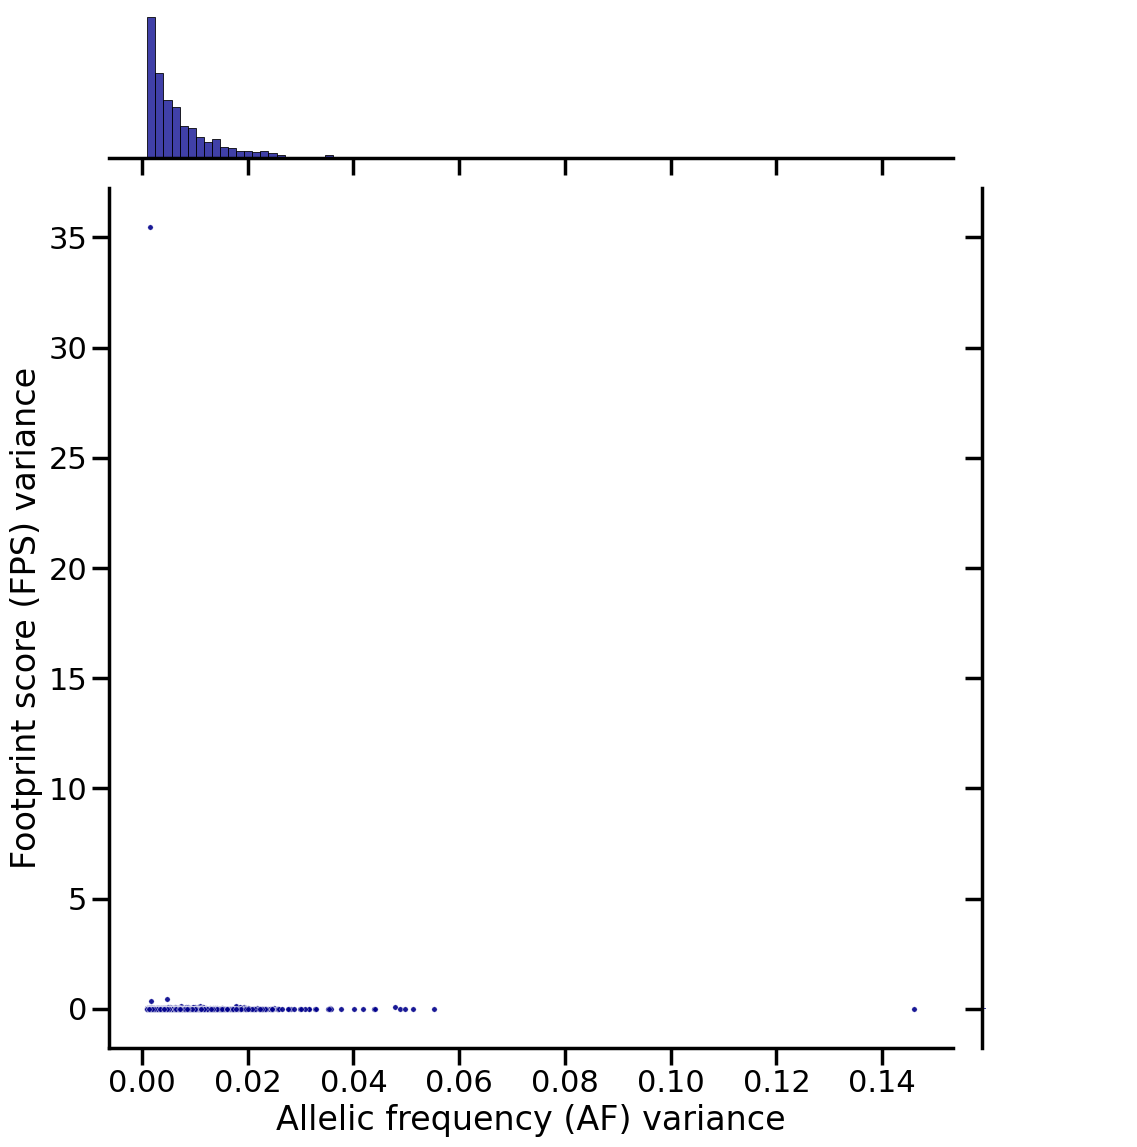

In [25]:
# plot scatterplot of AF variance vs FPS variance
sns.set_context("poster", rc={"figure.dpi": 300})
sns.jointplot(data=variance_df[(variance_df['af_var'] > 0.001) & (variance_df['fps_var'] > 0.001)], x='af_var', y='fps_var', height=12, s=15, alpha=0.9, color='darkblue')
plt.xlabel('Allelic frequency (AF) variance')
plt.ylabel('Footprint score (FPS) variance')
plt.show()


### Alternative approach

Instead of comparing the variance of footprint scores across subtypes per motif site with the variance of AF, we can compare the variance of the footprint scores across subtypes with the raw AF values.

In [28]:
# first extract AF columns from the matrix
af_df = matrix_afps.filter(regex='_AF$|_id$').copy()
af_df

2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  PU24GB8_lumB_AF  \
0             0.000000         0.000000          0.058824         0.000000   
1             0.000000         0.000000          0.029412         0.052632   
2             0.000000         0.125000          0.000000         0.000000   
3             0.000000         0.000000          0.000000         0.026316   
4             1.000000         1.000000          1.000000         1.000000   
...                ...              ...               ...              ...   
19550         0.083333         0.312500          0.000000         0.392857   
19551         1.000000         0.708333          0.807692         0.605263   
19552         0.000000         0.125000          0.000000         0.166667   
19553         0.000000         0.000000          0.000000         0.000000   
19554         0.000000         0.000000          0.058824         0.000000   

       S6R691V_her2_AF                 region_id  
0             0.000000        chr1:183696-183709  
1             0.058824        chr1:779047-779060  
2             0.031250        chr1:818732-818745  
3             0.000000        chr1:827305-827318  
4             1.000000        chr1:966269-966282  
...                ...                       ...  
19550         0.100000  chrX:155010390-155010403  
19551         0.852941  chrX:155395159-155395172  
19552         0.000000  chrX:155728199-155728212  
19553         0.000000    chrY:11097738-11097751  
19554         0.000000    chrY:11107236-11107249  

[19555 rows x 6 columns]

Then melt the AF dataframe into long format.

In [29]:
# convert to long format
af_df_long = af_df.melt(id_vars=["region_id"], var_name="variable", value_name="value")


# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
af_df_long[['sample_id', 'type']] = af_df_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
af_df_long = af_df_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
af_df_lpv = af_df_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name
af_df_lpv = af_df_lpv.rename_axis(None, axis=1)

# sort the dataframe by region_id naturally
af_df_lpv = af_df_lpv.reindex(index=index_natsorted(af_df_lpv['region_id']))
af_df_lpv = af_df_lpv.reset_index(drop=True)
af_df_lpv

region_id      sample_id        AF
0          chr1:183696-183709   2GAMBDQ_norm  0.000000
1          chr1:183696-183709   98JKPD8_lumA  0.000000
2          chr1:183696-183709  ANAB5F7_basal  0.058824
3          chr1:183696-183709   PU24GB8_lumB  0.000000
4          chr1:183696-183709   S6R691V_her2  0.000000
...                       ...            ...       ...
97770  chrY:11107236-11107249   2GAMBDQ_norm  0.000000
97771  chrY:11107236-11107249   98JKPD8_lumA  0.000000
97772  chrY:11107236-11107249  ANAB5F7_basal  0.058824
97773  chrY:11107236-11107249   PU24GB8_lumB  0.000000
97774  chrY:11107236-11107249   S6R691V_her2  0.000000

[97775 rows x 3 columns]

In [36]:
# Set index to 'region_id'
fps_var_df = fps_var_df.set_index('region_id')
fps_var_df

fps_var
region_id                          
chr1:160463084-160463097  35.475338
chr17:39675021-39675034    2.312871
chr12:27531819-27531832    0.763733
chr22:37633011-37633024    0.465607
chr1:236097130-236097143   0.448033
...                             ...
chr21:5757763-5757776      0.000000
chr2:91852381-91852394     0.000000
chr2:91852107-91852120     0.000000
chr3:195635119-195635132   0.000000
chr2:90360814-90360827     0.000000

[19555 rows x 1 columns]

In [39]:
# merge af_df_sorted_lpv and fps_var_df on region_id index
merged_df = pd.merge(fps_var_df, af_df_lpv, right_on='region_id', left_index=True, how='outer')
merged_df

fps_var                 region_id      sample_id        AF
5520   35.475338  chr1:160463084-160463097   2GAMBDQ_norm  1.000000
5521   35.475338  chr1:160463084-160463097   98JKPD8_lumA  0.944444
5522   35.475338  chr1:160463084-160463097  ANAB5F7_basal  1.000000
5523   35.475338  chr1:160463084-160463097   PU24GB8_lumB  0.928571
5524   35.475338  chr1:160463084-160463097   S6R691V_her2  0.923077
...          ...                       ...            ...       ...
12115   0.000000    chr2:90360814-90360827   2GAMBDQ_norm  0.312500
12116   0.000000    chr2:90360814-90360827   98JKPD8_lumA  0.772727
12117   0.000000    chr2:90360814-90360827  ANAB5F7_basal  0.423077
12118   0.000000    chr2:90360814-90360827   PU24GB8_lumB  0.205882
12119   0.000000    chr2:90360814-90360827   S6R691V_her2  0.588235

[97775 rows x 4 columns]

In [40]:
# reposition region_id column to the first column, sample_id to the second column and fps_var to the third column
cols = list(merged_df.columns)
cols.insert(0, cols.pop(cols.index('region_id')))
cols.insert(1, cols.pop(cols.index('sample_id')))
cols.insert(2, cols.pop(cols.index('fps_var')))
merged_df = merged_df.loc[:, cols]
merged_df

region_id      sample_id    fps_var        AF
5520   chr1:160463084-160463097   2GAMBDQ_norm  35.475338  1.000000
5521   chr1:160463084-160463097   98JKPD8_lumA  35.475338  0.944444
5522   chr1:160463084-160463097  ANAB5F7_basal  35.475338  1.000000
5523   chr1:160463084-160463097   PU24GB8_lumB  35.475338  0.928571
5524   chr1:160463084-160463097   S6R691V_her2  35.475338  0.923077
...                         ...            ...        ...       ...
12115    chr2:90360814-90360827   2GAMBDQ_norm   0.000000  0.312500
12116    chr2:90360814-90360827   98JKPD8_lumA   0.000000  0.772727
12117    chr2:90360814-90360827  ANAB5F7_basal   0.000000  0.423077
12118    chr2:90360814-90360827   PU24GB8_lumB   0.000000  0.205882
12119    chr2:90360814-90360827   S6R691V_her2   0.000000  0.588235

[97775 rows x 4 columns]

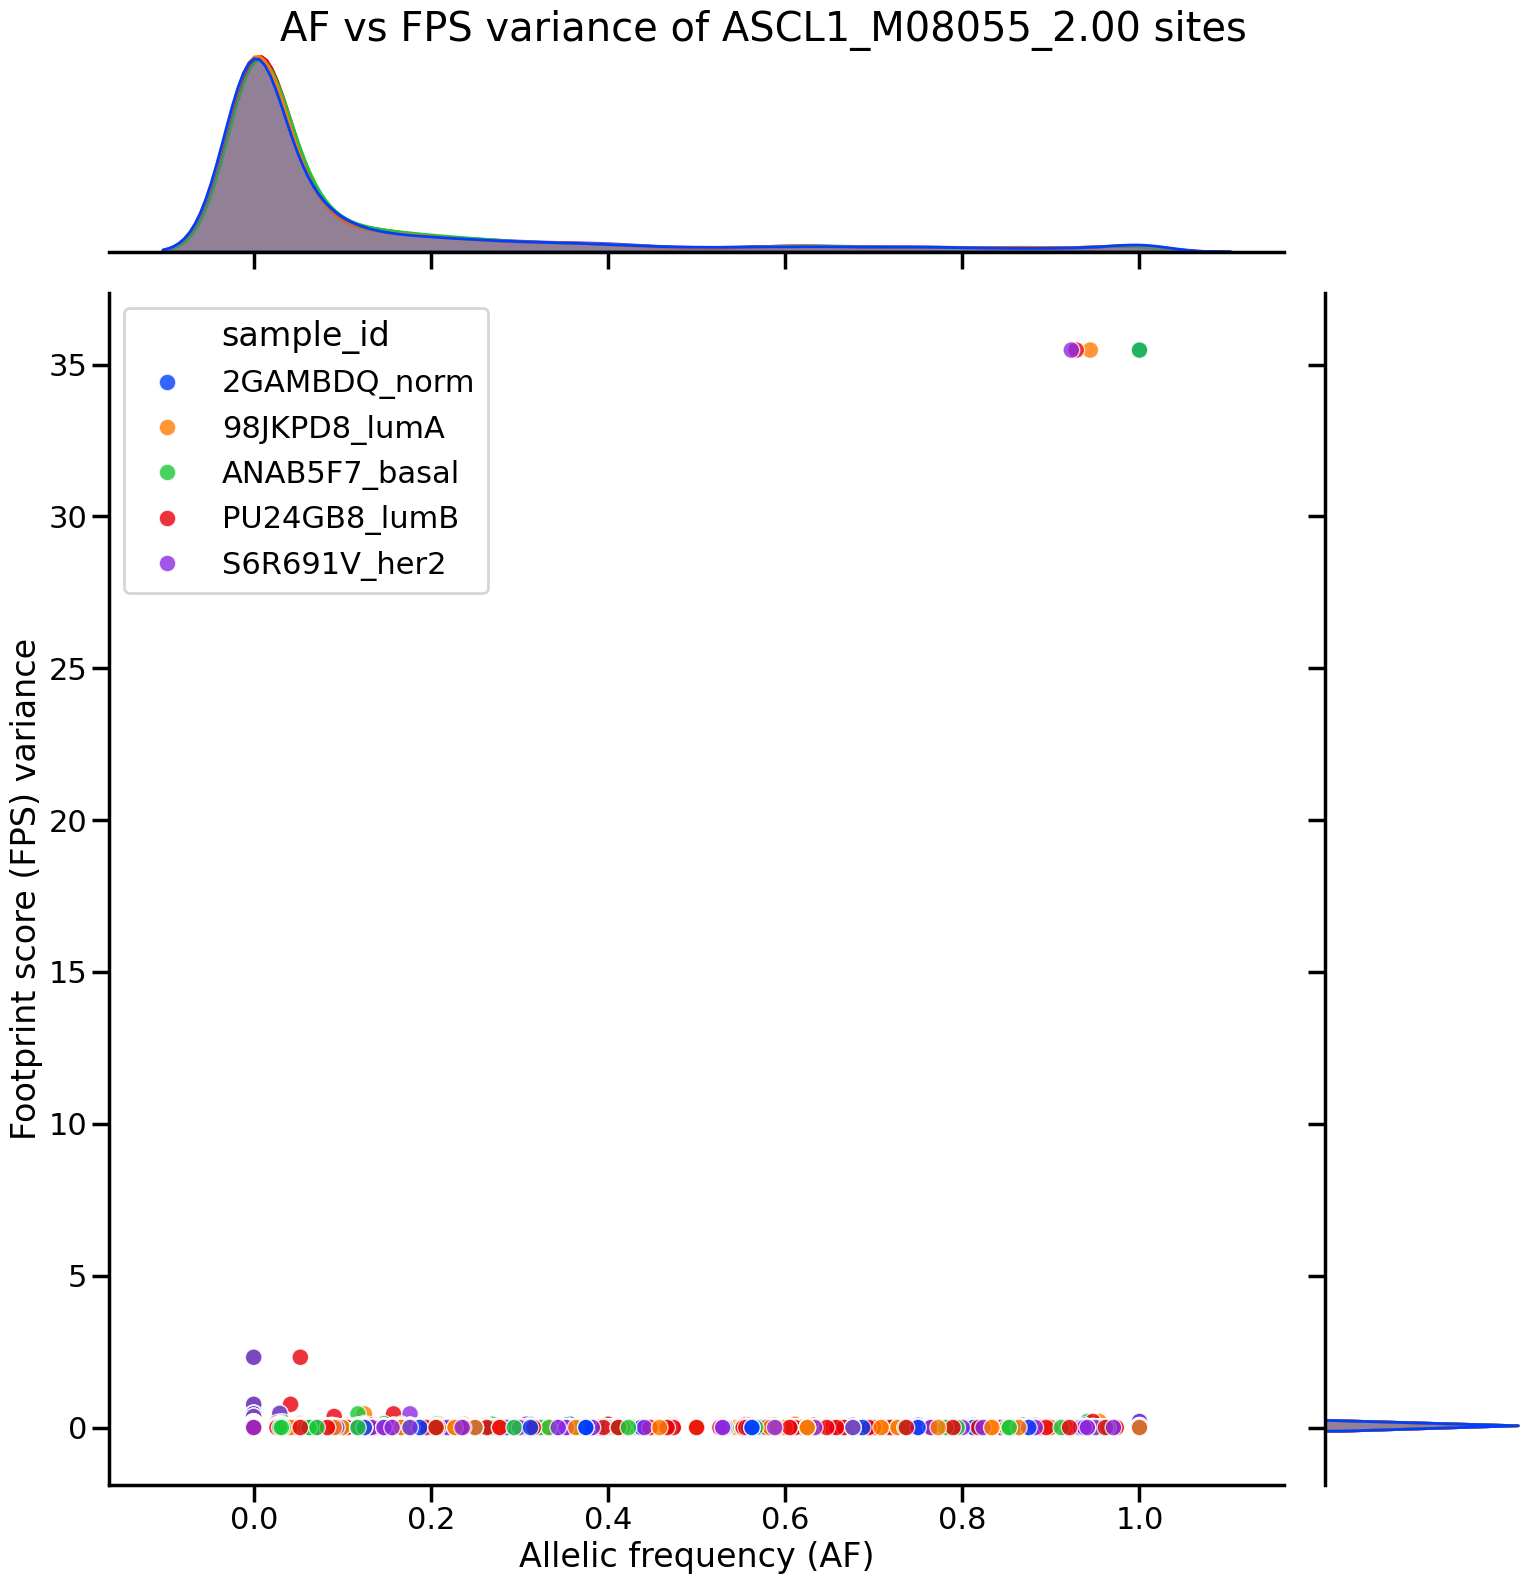

In [41]:
# plot scatterplot of AF vs FPS variance
# variance_df['color'] = (variance_df['af_var'] != 0) & (variance_df['fps_var'] != 0)
sns.set_context("poster", rc={"figure.dpi": 300})
g = sns.jointplot(data=merged_df, x='AF', y='fps_var', hue='sample_id', palette='bright', height=16, alpha=0.8)
# get handles and labels from jointplot
# handles, labels = g.ax_joint.get_legend_handles_labels()

# remove the original legend
# g.ax_joint.legend_.remove()

# move legend outside of plot
# g.fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='center right', fontsize=12)
plt.xlabel('Allelic frequency (AF)')
plt.ylabel('Footprint score (FPS) variance')
g.fig.suptitle(f'AF vs FPS variance of {motif_id} sites', y=1)
plt.show()

Now, reorder the longform AF dataframe based on the sorted FPS_variance `region_id` index.

In [ ]:
# # Create a categorical variable with ordered categories
# af_df['region_id'] = pd.Categorical(af_df['region_id'], categories=fps_var_df.index.unique(), ordered=True)

# # Sort by the categorical 'region_id'
# af_df_sorted = af_df.sort_values('region_id').reset_index(drop=True)

# af_df_sorted = af_df_sorted.set_index('region_id')
# af_df_sorted

In [29]:
# compute correlation between AF and FPS variance
variance_df.drop(columns=['color']).corr()

fps_var    af_var
fps_var  1.000000 -0.014751
af_var  -0.014751  1.000000

In [30]:
# compute covariance between AF and FPS variance
variance_df.drop(columns=['color']).cov()

fps_var    af_var
fps_var  0.000337 -0.000004
af_var  -0.000004  0.000246

In [42]:
varsites = pd.read_csv('/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_varsite_counts/1360-motifs-combined-AF-filtered-varsite-counts.tsv', sep='\t')

varsites

sample_id  unique_sites                 motif_id
0      2GAMBDQ_norm           295  AHR_AHR_HUMAN.H11MO.0.B
1      98JKPD8_lumA           315  AHR_AHR_HUMAN.H11MO.0.B
2     ANAB5F7_basal           301  AHR_AHR_HUMAN.H11MO.0.B
3      PU24GB8_lumB           293  AHR_AHR_HUMAN.H11MO.0.B
4      S6R691V_her2           302  AHR_AHR_HUMAN.H11MO.0.B
...             ...           ...                      ...
6795   98JKPD8_lumA           816      ZSCAN5C_M08390_2.00
6796  ANAB5F7_basal           809      ZSCAN5C_M08390_2.00
6797   PU24GB8_lumB           805      ZSCAN5C_M08390_2.00
6798   S6R691V_her2           818      ZSCAN5C_M08390_2.00
6799   2GAMBDQ_norm           825      ZSCAN5C_M08390_2.00

[6800 rows x 3 columns]

In [76]:
# sort by unique varsite counts in descending order
varsites = varsites.sort_values(by='unique_sites', ascending=False)
varsites

sample_id  unique_sites            motif_id
5354   2GAMBDQ_norm         17077  ZNF287_M07590_2.00
5350   98JKPD8_lumA         17050  ZNF287_M07590_2.00
5353   PU24GB8_lumB         16767  ZNF287_M07590_2.00
5155   2GAMBDQ_norm         16514  ZNF235_M07605_2.00
5352  ANAB5F7_basal         16472  ZNF287_M07590_2.00
...             ...           ...                 ...
6271   98JKPD8_lumA            55  ZNF669_M08262_2.00
6273   PU24GB8_lumB            48  ZNF669_M08262_2.00
6274   S6R691V_her2            48  ZNF669_M08262_2.00
6270   2GAMBDQ_norm            47  ZNF669_M08262_2.00
6272  ANAB5F7_basal            41  ZNF669_M08262_2.00

[6800 rows x 3 columns]

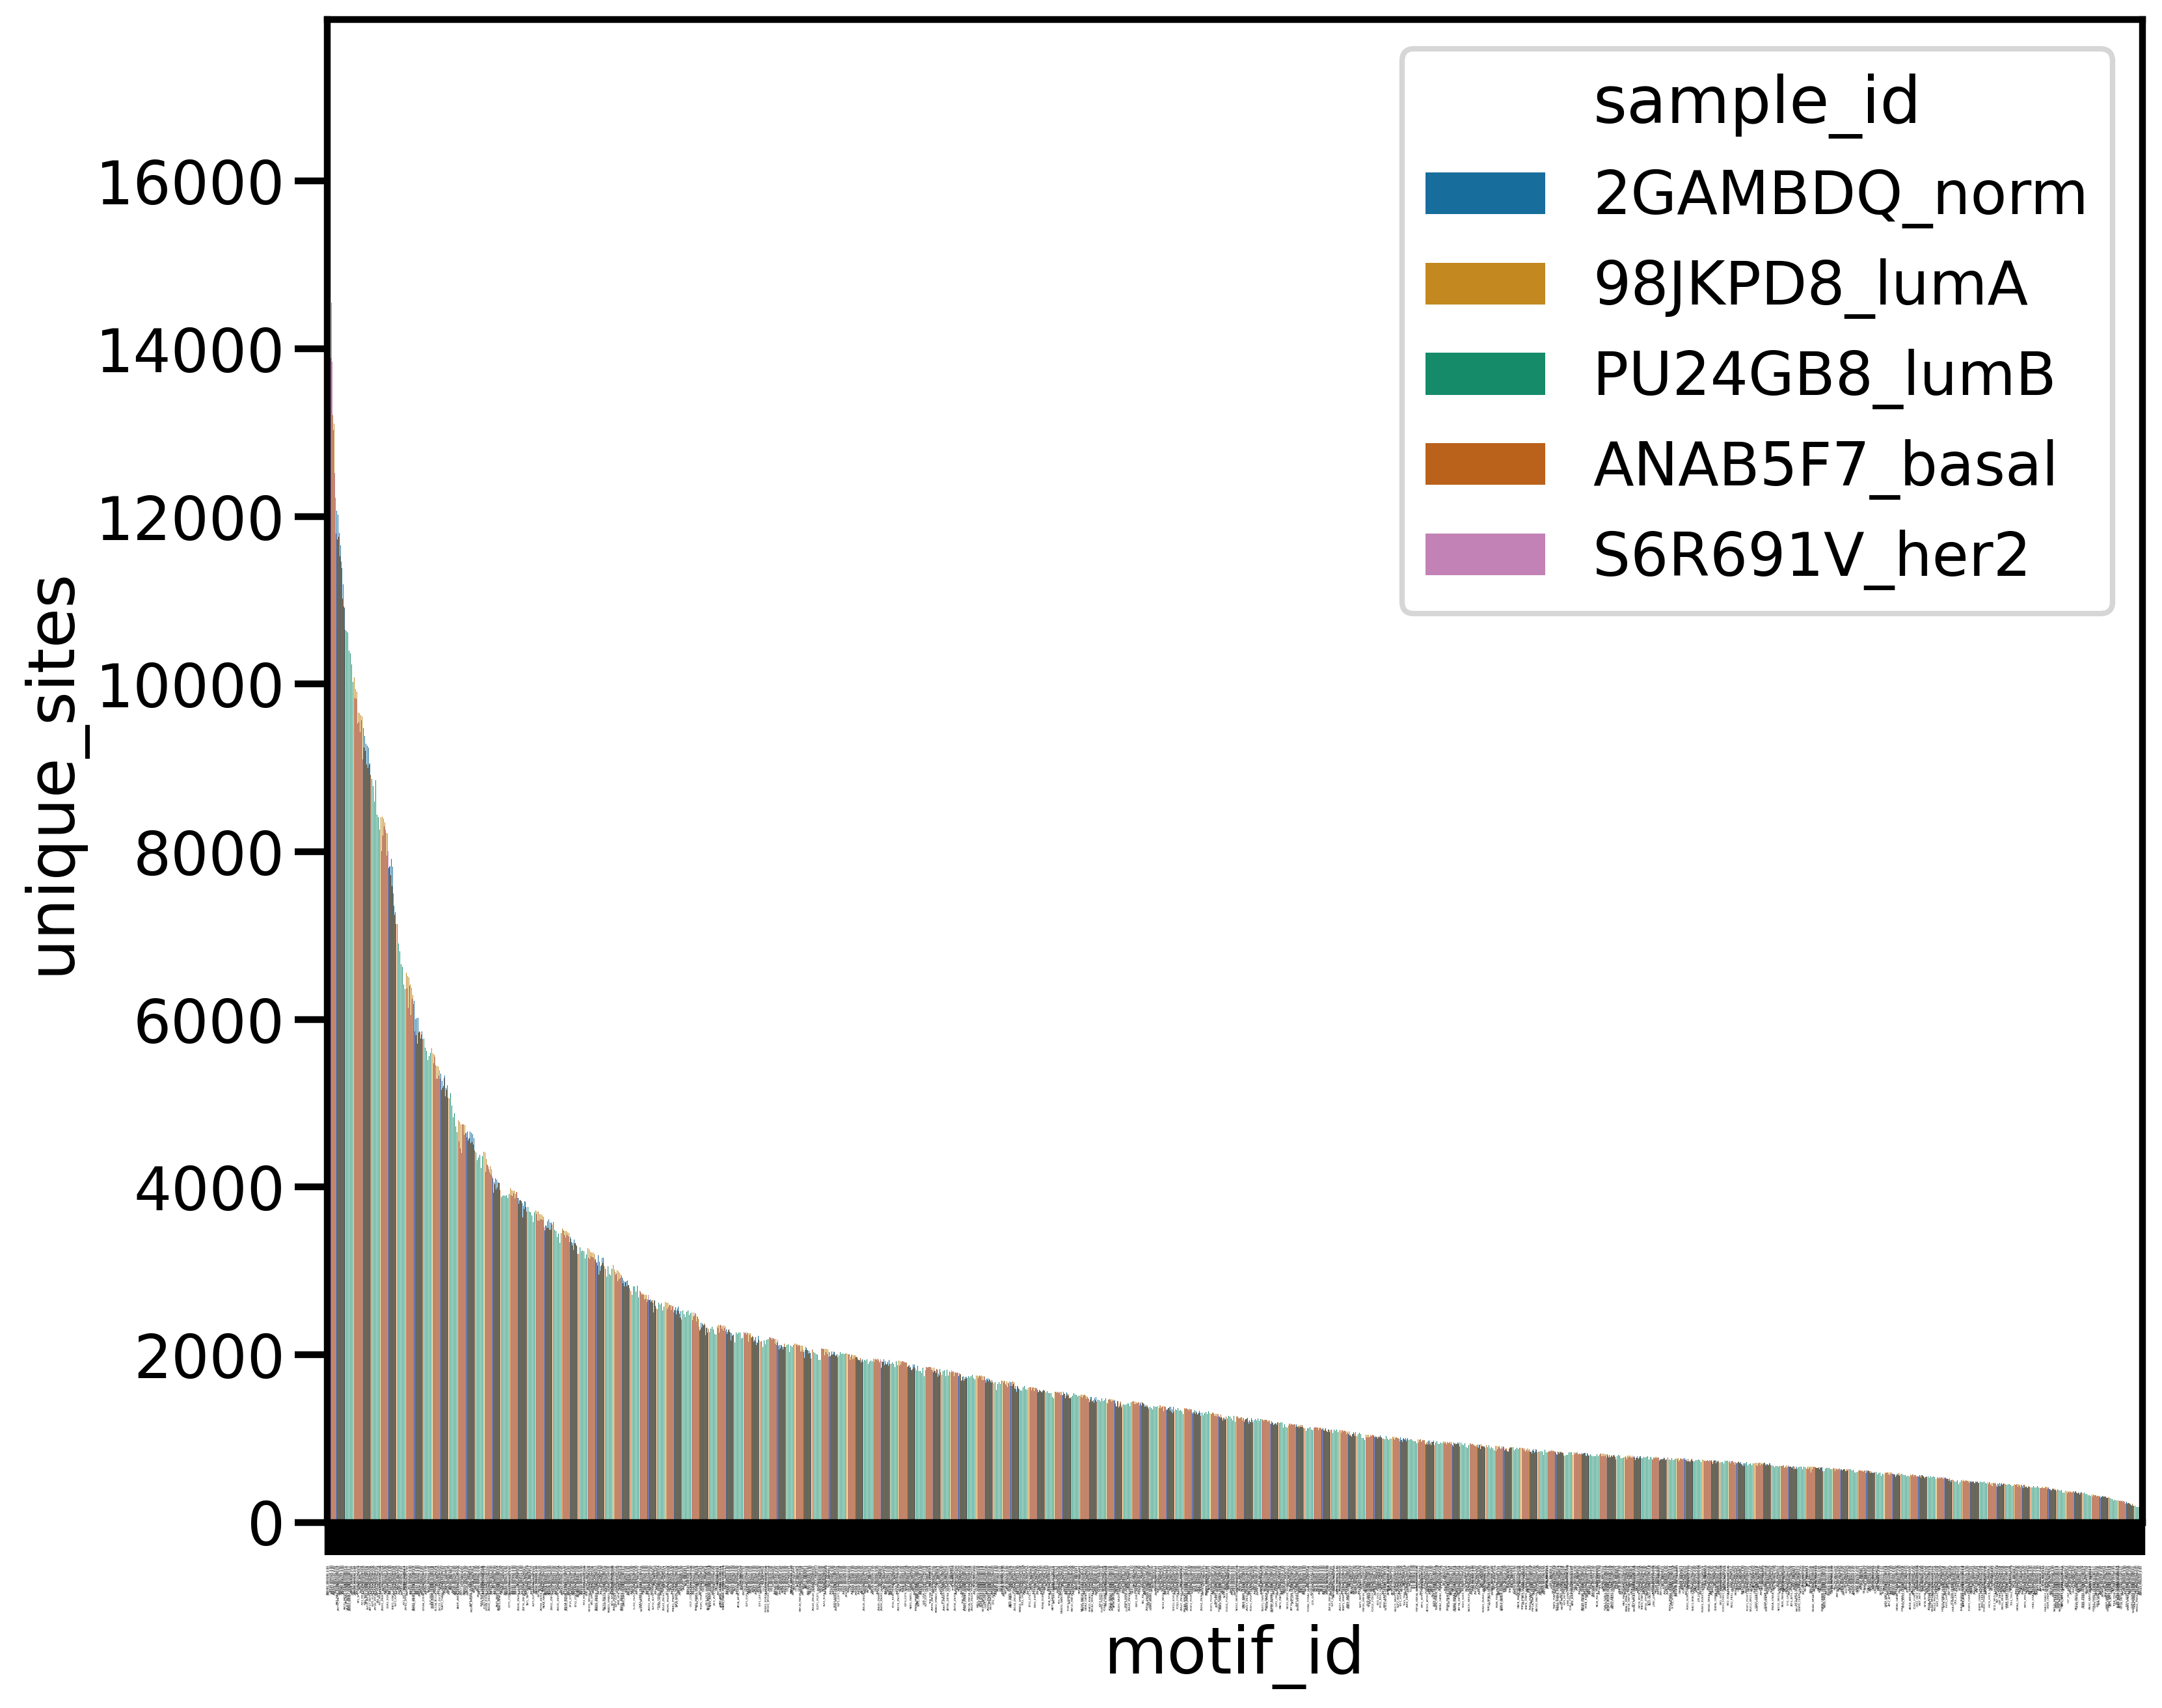

In [77]:
# plot barplot
plt.figure(figsize=(12,10), dpi=300)
sns.barplot(data=varsites, x='motif_id', y='unique_sites', hue='sample_id', palette='colorblind')
plt.xticks(rotation=90, fontsize=1)
plt.show()

In [88]:
varsites_mean_count = varsites.groupby('motif_id', observed=False)['unique_sites'].mean().sort_values(ascending=False).to_frame().reset_index()
# extract first 20 motif_ids from sorted_varsites_var and put into a list
top = varsites_mean_count['motif_id'].head(25).tolist()
top

['ZNF287_M07590_2.00',
 'ZNF235_M07605_2.00',
 'ZFP28_M08378_2.00',
 'ZNF487_M07782_2.00',
 'ZNF432_M07773_2.00',
 'ZNF225_M07776_2.00',
 'ZNF35_M08334_2.00',
 'ZN770_ZN770_HUMAN.H11MO.0.C',
 'MAZ_MAZ_HUMAN.H11MO.0.A',
 'ZNF879_M07766_2.00',
 'ZNF880_M07764_2.00',
 'PRDM6_M08277_2.00',
 'ZNF467_M08260_2.00',
 'PATZ1_PATZ1_HUMAN.H11MO.0.C',
 'SP2_SP2_HUMAN.H11MO.0.A',
 'VEZF1_VEZF1_HUMAN.H11MO.0.C',
 'ZN467_ZN467_HUMAN.H11MO.0.C',
 'ZN341_ZN341_HUMAN.H11MO.0.C',
 'ZNF98_M08380_2.00',
 'ZNF383_M07689_2.00',
 'PRDM9_M07610_2.00',
 'ZNF529_M07678_2.00',
 'ZNF418_M07712_2.00',
 'ZNF93_M07671_2.00',
 'SP1_SP1_HUMAN.H11MO.0.A']

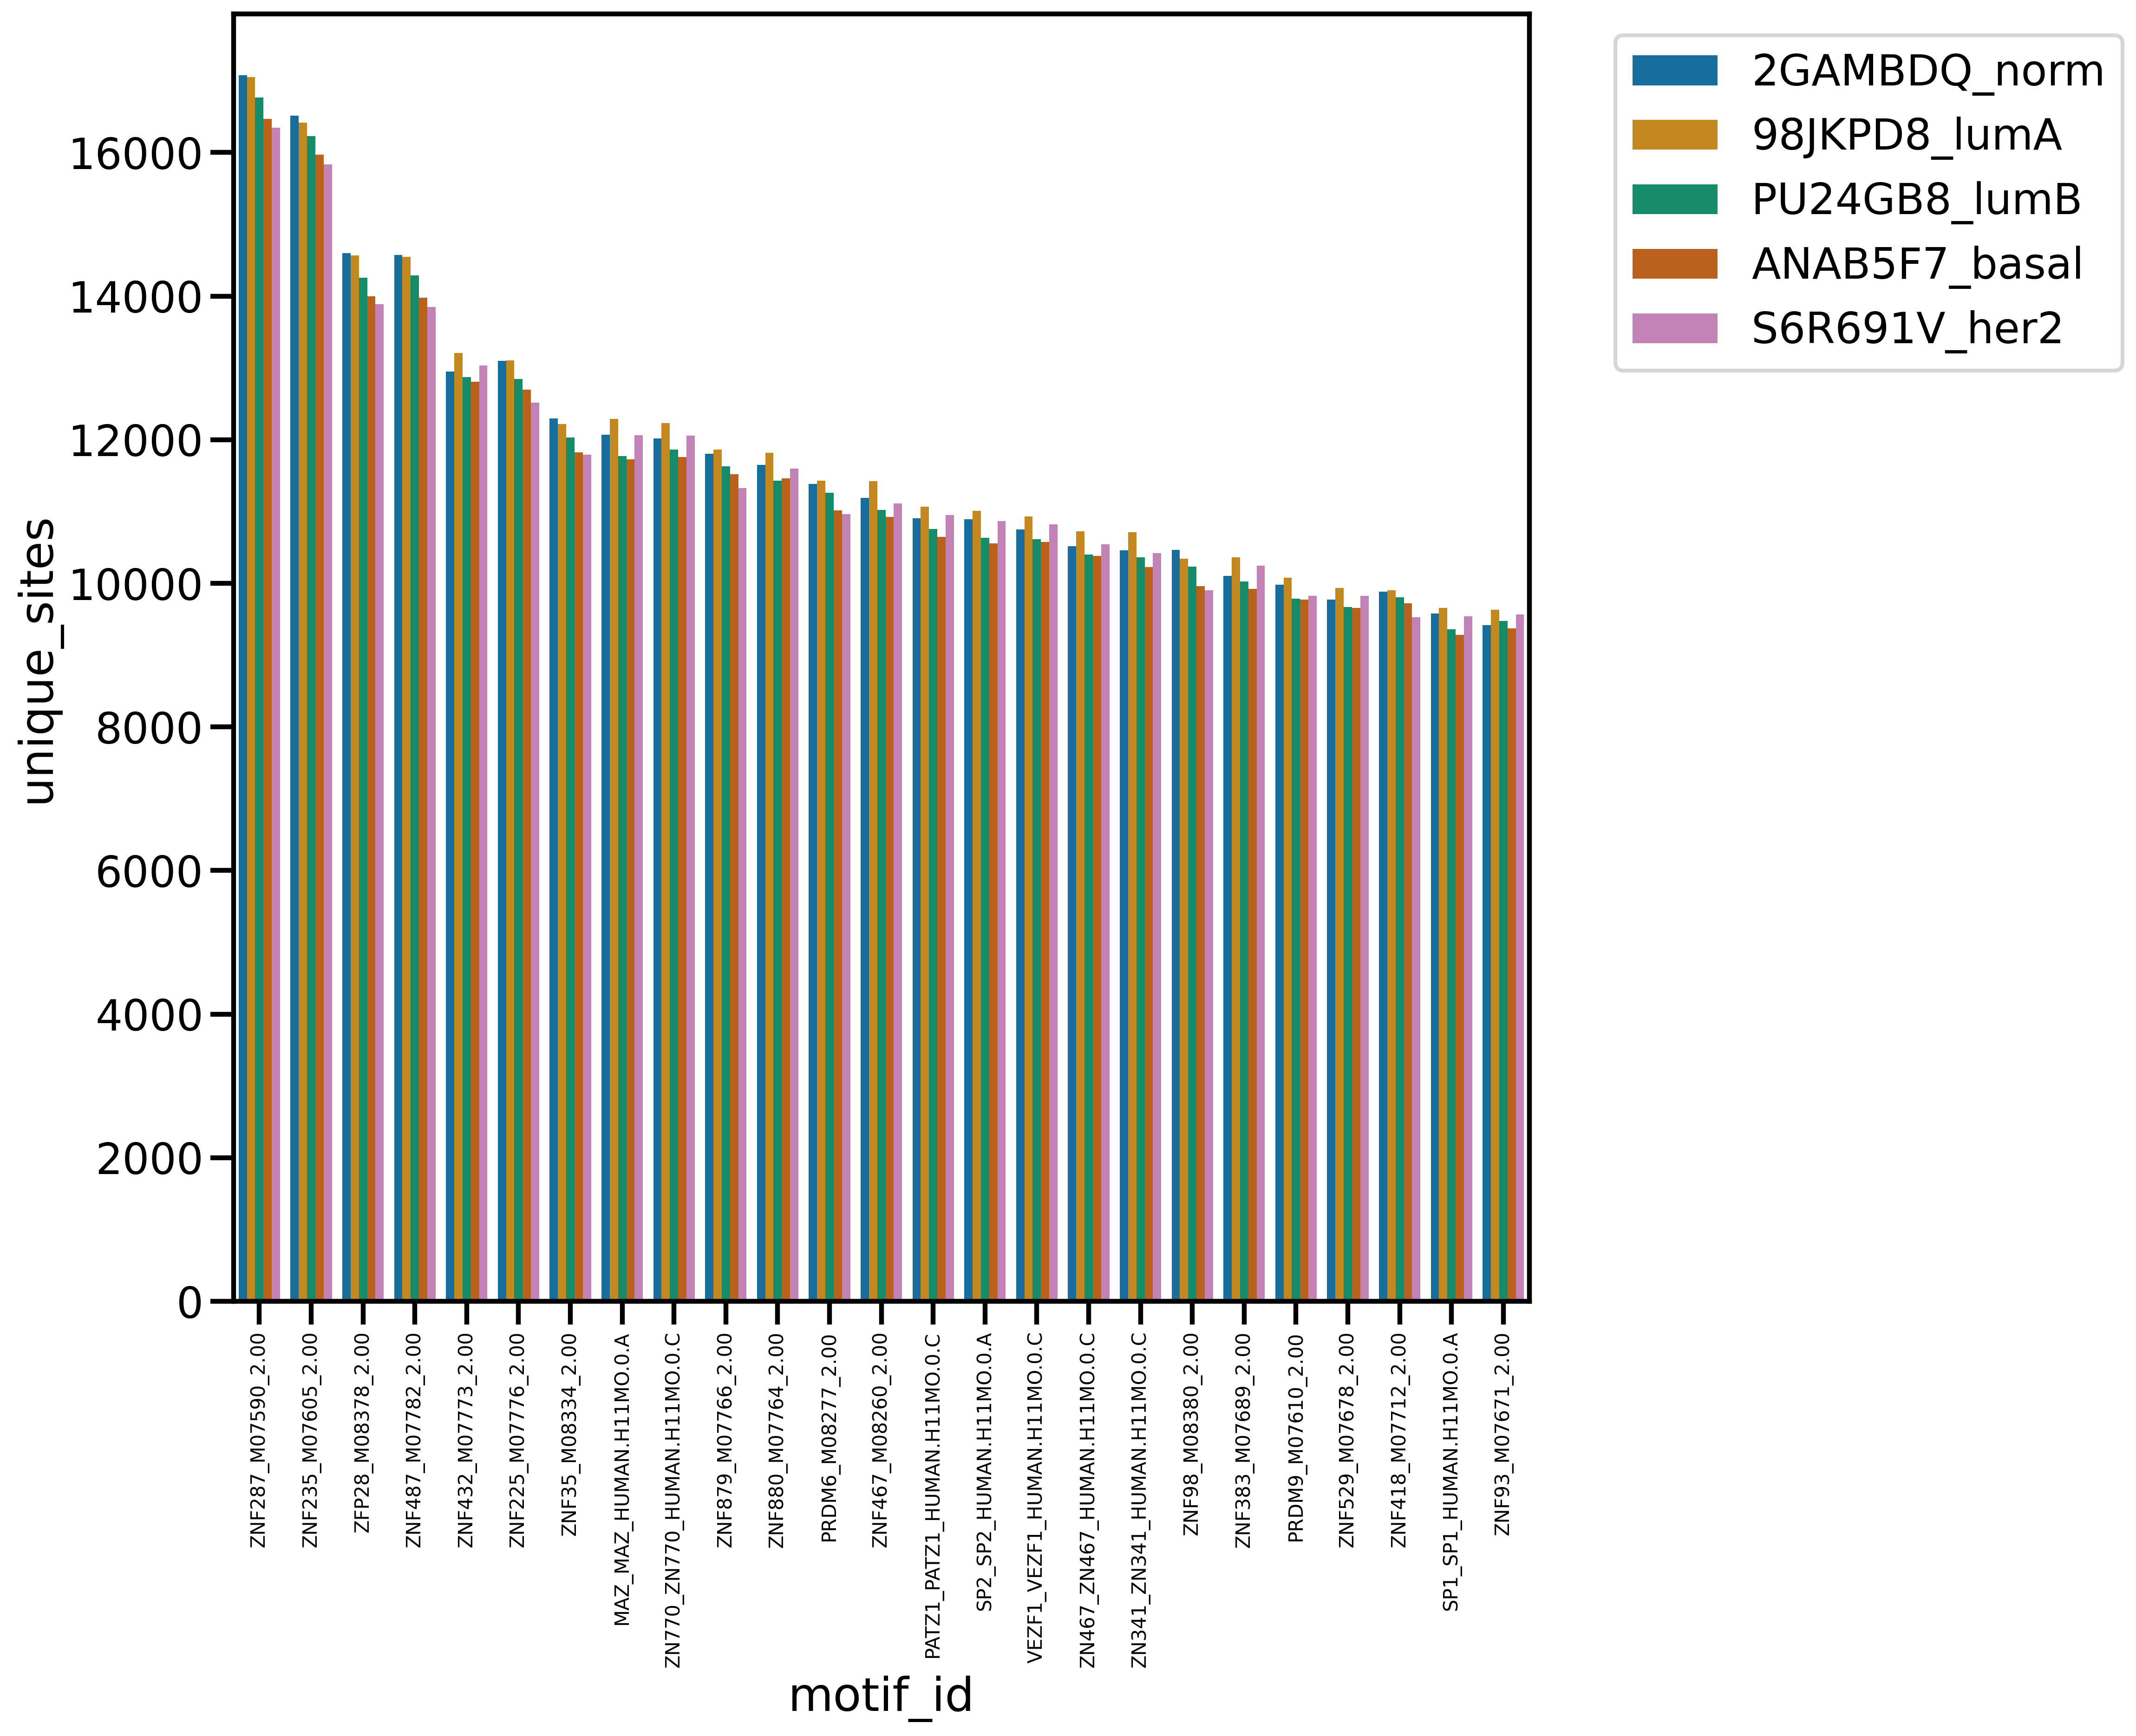

In [89]:
# filter DataFrame to only include rows where motif_id is in motif_ids_to_plot
varsites_filt = varsites[varsites['motif_id'].isin(top)]
# plot a barplot of the number of unique sites per motif
plt.figure(figsize=(12,12), dpi=300)
sns.barplot(data=varsites_filt, x='motif_id', y='unique_sites', hue='sample_id', palette='colorblind')
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [73]:
# calculate iqr for each motif_id using groupby
iqr = varsites.groupby('motif_id')['unique_sites'].quantile(0.75) - varsites.groupby('motif_id')['unique_sites'].quantile(0.25)
iqr_df = iqr.to_frame().reset_index()
iqr_df = iqr_df.rename(columns={'unique_sites': 'iqr'})
iqr_df
sorted_iqr_df = iqr_df.sort_values(by='iqr', ascending=False)
sorted_iqr_df.head(50)

motif_id    iqr
1070           ZNF287_M07590_2.00  578.0
1173           ZNF487_M07782_2.00  573.0
897             ZFP28_M08378_2.00  567.0
1031           ZNF235_M07605_2.00  447.0
1029           ZNF225_M07776_2.00  405.0
1113            ZNF35_M08334_2.00  394.0
1348            ZNF98_M08380_2.00  378.0
638             PRDM6_M08277_2.00  372.0
898   ZFP28_ZFP28_HUMAN.H11MO.0.C  347.0
1175           ZNF492_M07765_2.00  331.0
358              IRF1_M08142_2.00  307.0
1020           ZNF212_M07625_2.00  303.0
1003           ZNF182_M07597_2.00  303.0
773   STAT2_STAT2_HUMAN.H11MO.0.A  294.0
452       MAZ_MAZ_HUMAN.H11MO.0.A  293.0
360     IRF3_IRF3_HUMAN.H11MO.0.B  287.0
999            ZNF175_M08292_2.00  286.0
1338           ZNF879_M07766_2.00  284.0
641                PRDM9_MA1723.1  283.0
357     IRF1_IRF1_HUMAN.H11MO.0.A  276.0
1235           ZNF613_M07646_2.00  266.0
737       SP2_SP2_HUMAN.H11MO.0.A  264.0
1214           ZNF567_M07692_2.00  252.0
951   ZN394_ZN394_HUMAN.H11MO.0.C  242.0
1263           ZNF677_M08382_2.00  235.0
1215           ZNF570_M07635_2.00  223.0
732       SP1_SP1_HUMAN.H11MO.0.A  221.0
1121           ZNF384_M08306_2.00  220.0
1119           ZNF383_M07689_2.00  219.0
359     IRF2_IRF2_HUMAN.H11MO.0.A  213.0
1288            ZNF71_M08383_2.00  208.0
850   VEZF1_VEZF1_HUMAN.H11MO.0.C  203.0
640             PRDM9_M07610_2.00  200.0
402   KLF15_KLF15_HUMAN.H11MO.0.A  198.0
589   PATZ1_PATZ1_HUMAN.H11MO.0.C  197.0
969   ZN770_ZN770_HUMAN.H11MO.0.C  197.0
738       SP3_SP3_HUMAN.H11MO.0.B  197.0
1339           ZNF880_M07764_2.00  191.0
1076            ZNF30_M07621_2.00  191.0
1001           ZNF180_M07614_2.00  186.0
734               SP2_M08092_2.00  183.0
1216           ZNF571_M07658_2.00  178.0
403             KLF15_M08323_2.00  170.0
1164           ZNF467_M08260_2.00  167.0
851       WT1_WT1_HUMAN.H11MO.0.C  166.0
1131           ZNF418_M07712_2.00  163.0
405     KLF1_KLF1_HUMAN.H11MO.0.A  163.0
1143           ZNF432_M07773_2.00  160.0
975            ZNF121_M08384_2.00  158.0
400             KLF14_M08398_2.00  158.0

In [74]:
# calculate variance of site counts per motif_id using groupby
varsites_var = varsites.groupby('motif_id')['unique_sites'].var().reset_index().rename(columns={'unique_sites': 'sitecount_var'})
varsites_var
sorted_varsites_var = varsites_var.sort_values(by='sitecount_var', ascending=False)
sorted_varsites_var.head(50)

# extract first 20 motif_ids from sorted_varsites_var and put into a list
top = sorted_varsites_var['motif_id'].head(50).tolist()
top

['ZNF287_M07590_2.00',
 'ZNF487_M07782_2.00',
 'ZFP28_M08378_2.00',
 'ZNF235_M07605_2.00',
 'ZNF225_M07776_2.00',
 'ZNF98_M08380_2.00',
 'MAZ_MAZ_HUMAN.H11MO.0.A',
 'ZNF35_M08334_2.00',
 'ZNF879_M07766_2.00',
 'PRDM6_M08277_2.00',
 'IRF3_IRF3_HUMAN.H11MO.0.B',
 'IRF1_IRF1_HUMAN.H11MO.0.A',
 'ZNF212_M07625_2.00',
 'ZFP28_ZFP28_HUMAN.H11MO.0.C',
 'ZNF467_M08260_2.00',
 'SP2_SP2_HUMAN.H11MO.0.A',
 'ZNF492_M07765_2.00',
 'IRF1_M08142_2.00',
 'ZN770_ZN770_HUMAN.H11MO.0.C',
 'ZNF613_M07646_2.00',
 'STAT2_STAT2_HUMAN.H11MO.0.A',
 'ZNF383_M07689_2.00',
 'ZNF567_M07692_2.00',
 'ZN341_ZN341_HUMAN.H11MO.0.C',
 'ZNF182_M07597_2.00',
 'PATZ1_PATZ1_HUMAN.H11MO.0.C',
 'IRF2_IRF2_HUMAN.H11MO.0.A',
 'PRDM9_MA1723.1',
 'ZNF570_M07635_2.00',
 'KLF15_KLF15_HUMAN.H11MO.0.A',
 'SP1_SP1_HUMAN.H11MO.0.A',
 'ZN394_ZN394_HUMAN.H11MO.0.C',
 'ZNF432_M07773_2.00',
 'ZNF880_M07764_2.00',
 'WT1_WT1_HUMAN.H11MO.0.C',
 'ZNF175_M08292_2.00',
 'ZNF418_M07712_2.00',
 'Z354A_Z354A_HUMAN.H11MO.0.C',
 'ZNF341_M08310_2.00',


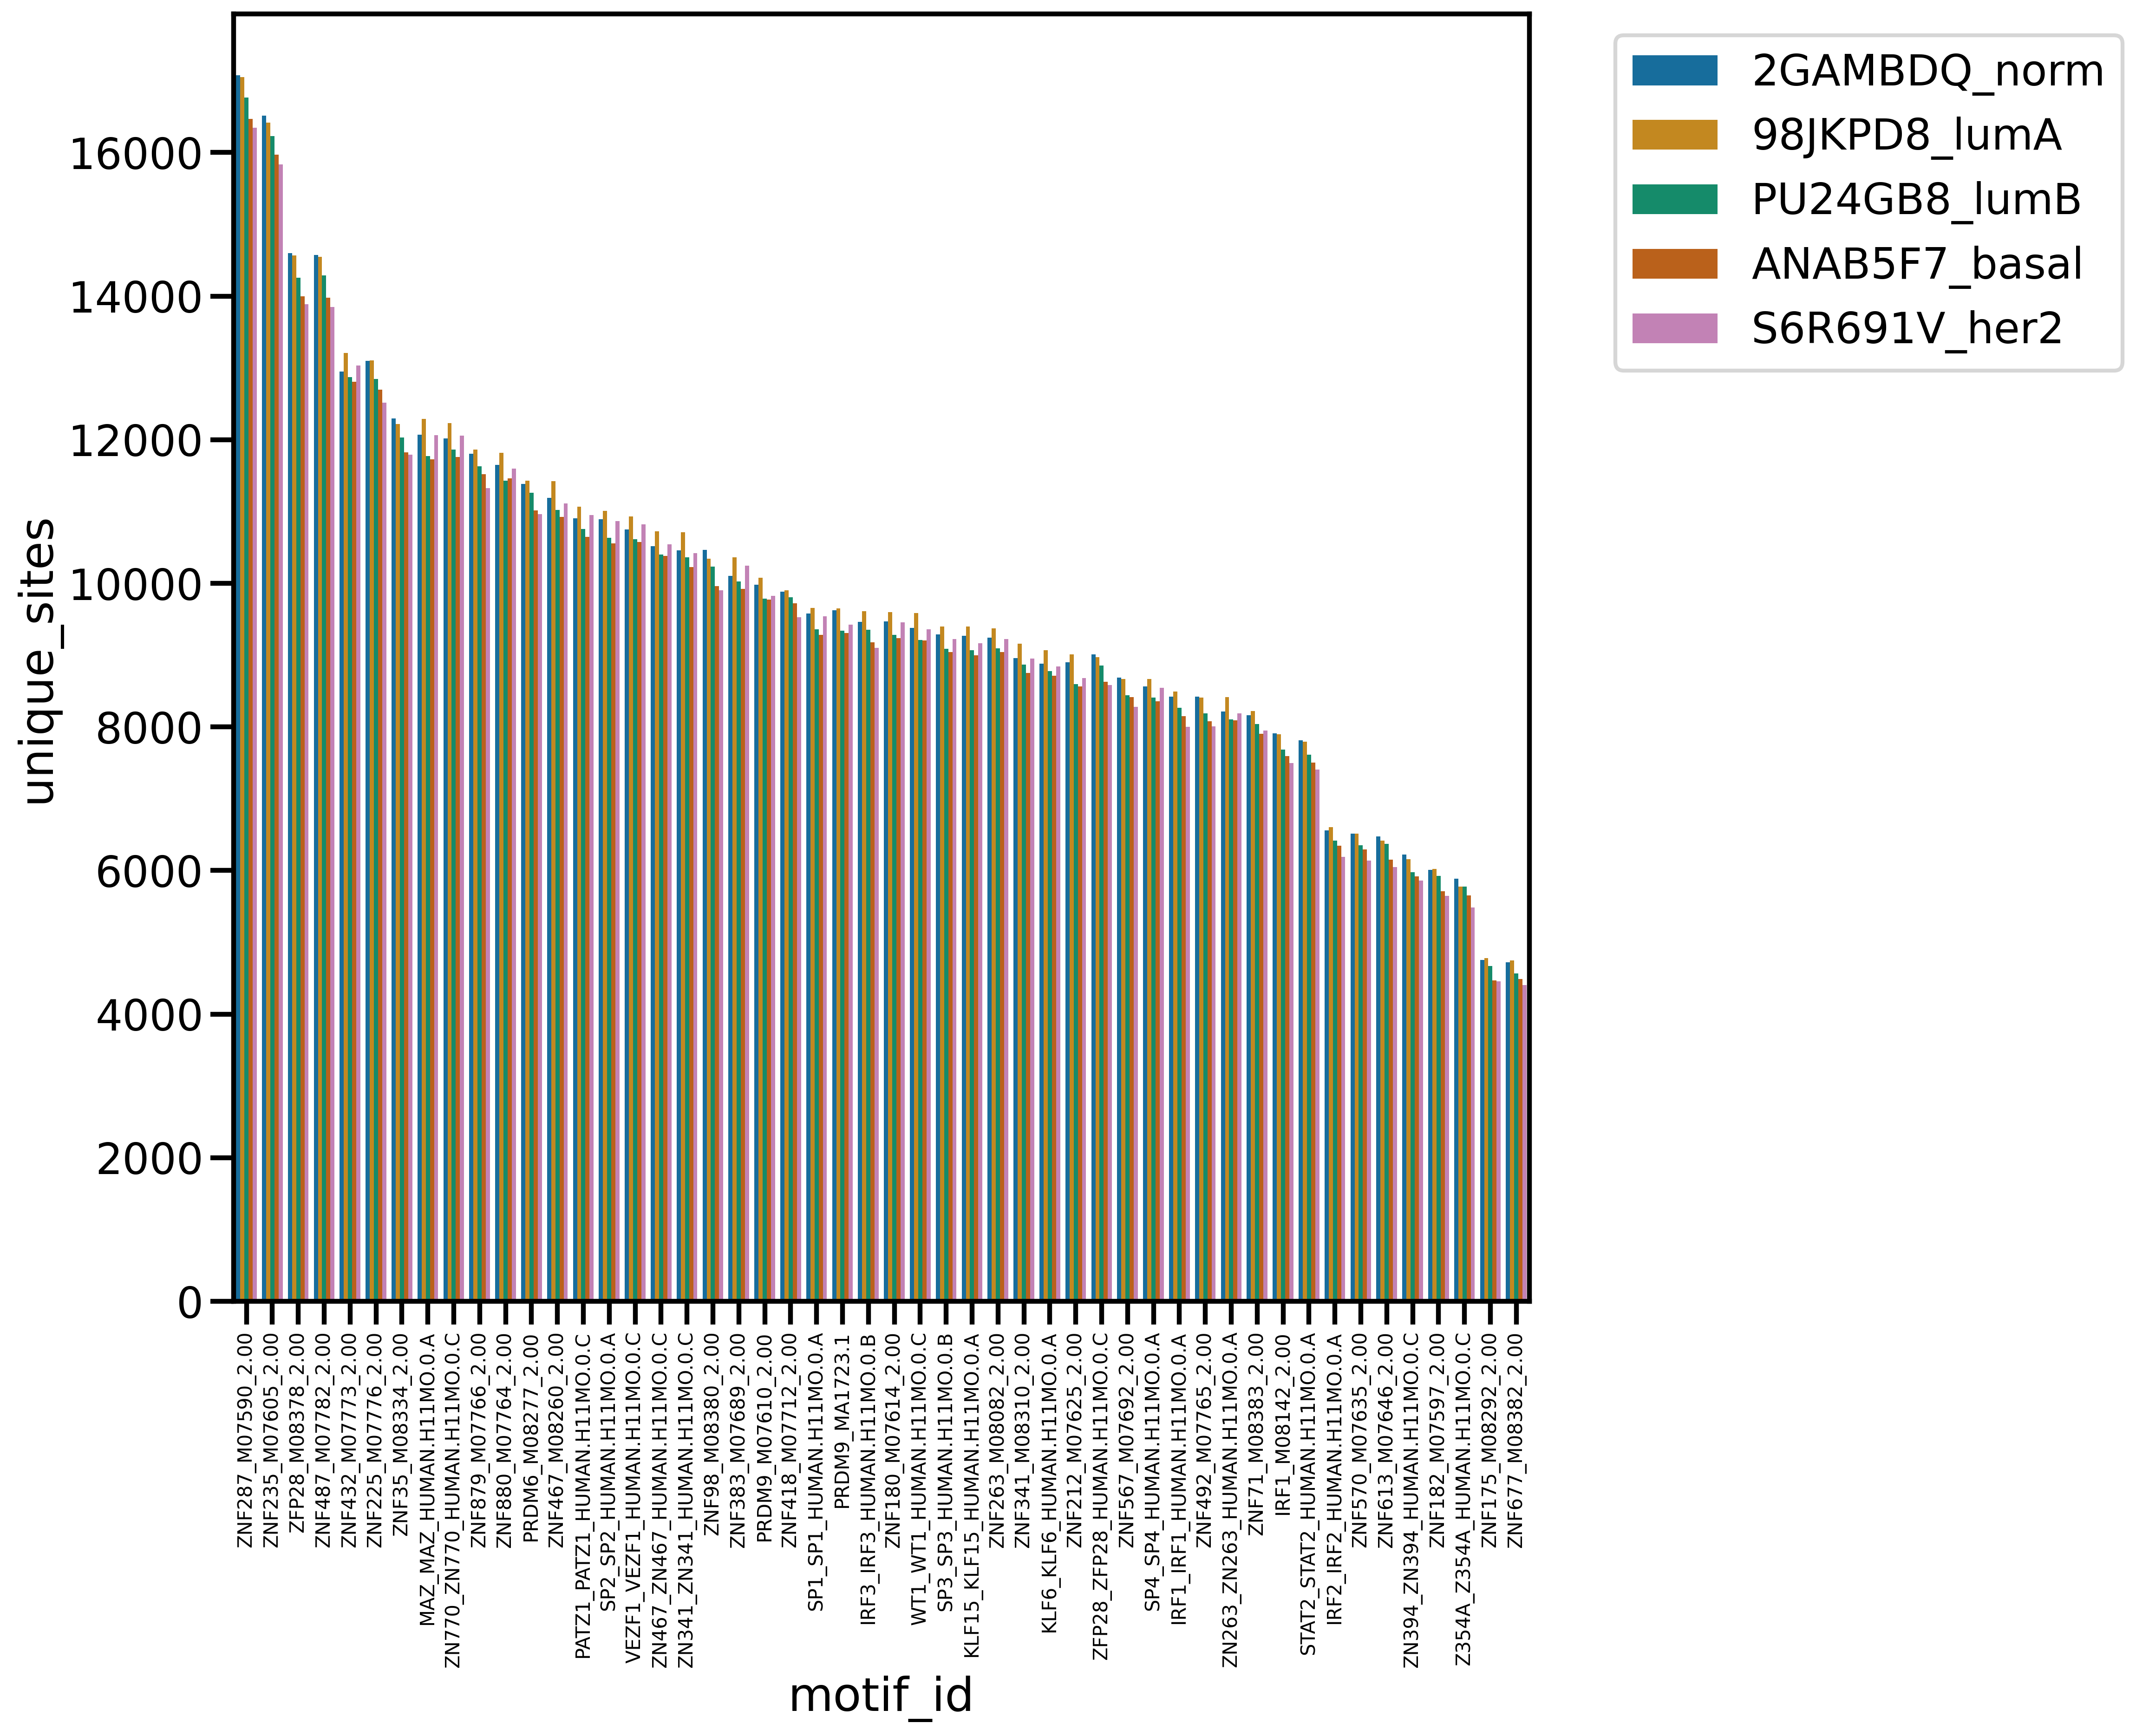

In [75]:
# filter DataFrame to only include rows where motif_id is in motif_ids_to_plot
varsites_filt = varsites[varsites['motif_id'].isin(top)]
# plot a barplot of the number of unique sites per motif
plt.figure(figsize=(12,12), dpi=300)
sns.barplot(data=varsites_filt, x='motif_id', y='unique_sites', hue='sample_id', palette='colorblind')
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
# extract motif id from filename
filepath = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/ASCL1_M08055_2.00_fpscore-af-varsites-combined-matrix-wide.tsv'

motif_id = os.path.basename(filepath).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
# print message
print(f'Processing {motif_id}...')

# load data file
matrix_df = pd.read_csv(filepath, sep='\t')
# filter df
fps_df = matrix_df.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
# subset the dataframe to just the 'fps_var' column and reset the index
fps_var_df = fps_df[['fps_var']].reset_index()
# sort the df by fps_var in descending order
fps_var_df = fps_var_df.sort_values(by='fps_var', ascending=False)
	
af_df = matrix_df.filter(regex='_AF$|_id$')
af_df = af_df.set_index('region_id')
# retain rows where at least one sample has AF > 0.5
af_df = af_df[(af_df > 0.5).any(axis=1)]

af_df['af_var'] = af_df.var(axis=1)
af_var_df = af_df[['af_var']].reset_index()
af_var_df = af_var_df.sort_values(by='af_var', ascending=False)
af_var_df = af_var_df.set_index('region_id')

Processing ASCL1_M08055_2.00...


In [59]:
af_var_df

af_var
region_id                       
chr21:8338878-8338891        0.3
chrX:138711348-138711361     0.3
chr8:127317230-127317243     0.3
chr1:193723628-193723641     0.3
chr11:18120820-18120833      0.3
...                          ...
chr16:72838346-72838359      0.0
chr4:160746786-160746799     0.0
chr1:53145901-53145914       0.0
chr1:36243949-36243962       0.0
chr12:51265279-51265292      0.0

[2795 rows x 1 columns]

In [60]:
fps_var_df

region_id    fps_var
1104   chr1:160463084-160463097  35.475338
15928   chr17:39675021-39675034   2.312871
12525   chr12:27531819-27531832   0.763733
18938   chr22:37633011-37633024   0.465607
1677   chr1:236097130-236097143   0.448033
...                         ...        ...
18311     chr21:5757763-5757776   0.000000
2429     chr2:91852381-91852394   0.000000
2428     chr2:91852107-91852120   0.000000
4391   chr3:195635119-195635132   0.000000
2423     chr2:90360814-90360827   0.000000

[19555 rows x 2 columns]

In [62]:
variance_df = pd.merge(af_var_df, fps_var_df, left_index=True, right_on='region_id')
variance_df = variance_df[['region_id', 'af_var', 'fps_var']]
variance_df

region_id  af_var   fps_var
18316     chr21:8338878-8338891     0.3  0.000000
19488  chrX:138711348-138711361     0.3  0.000071
9285   chr8:127317230-127317243     0.3  0.000018
1306   chr1:193723628-193723641     0.3  0.000007
11538   chr11:18120820-18120833     0.3  0.000007
...                         ...     ...       ...
15328   chr16:72838346-72838359     0.0  0.000031
5168   chr4:160746786-160746799     0.0  0.000653
613      chr1:53145901-53145914     0.0  0.000034
480      chr1:36243949-36243962     0.0  0.000010
12622   chr12:51265279-51265292     0.0  0.000042

[2795 rows x 3 columns]

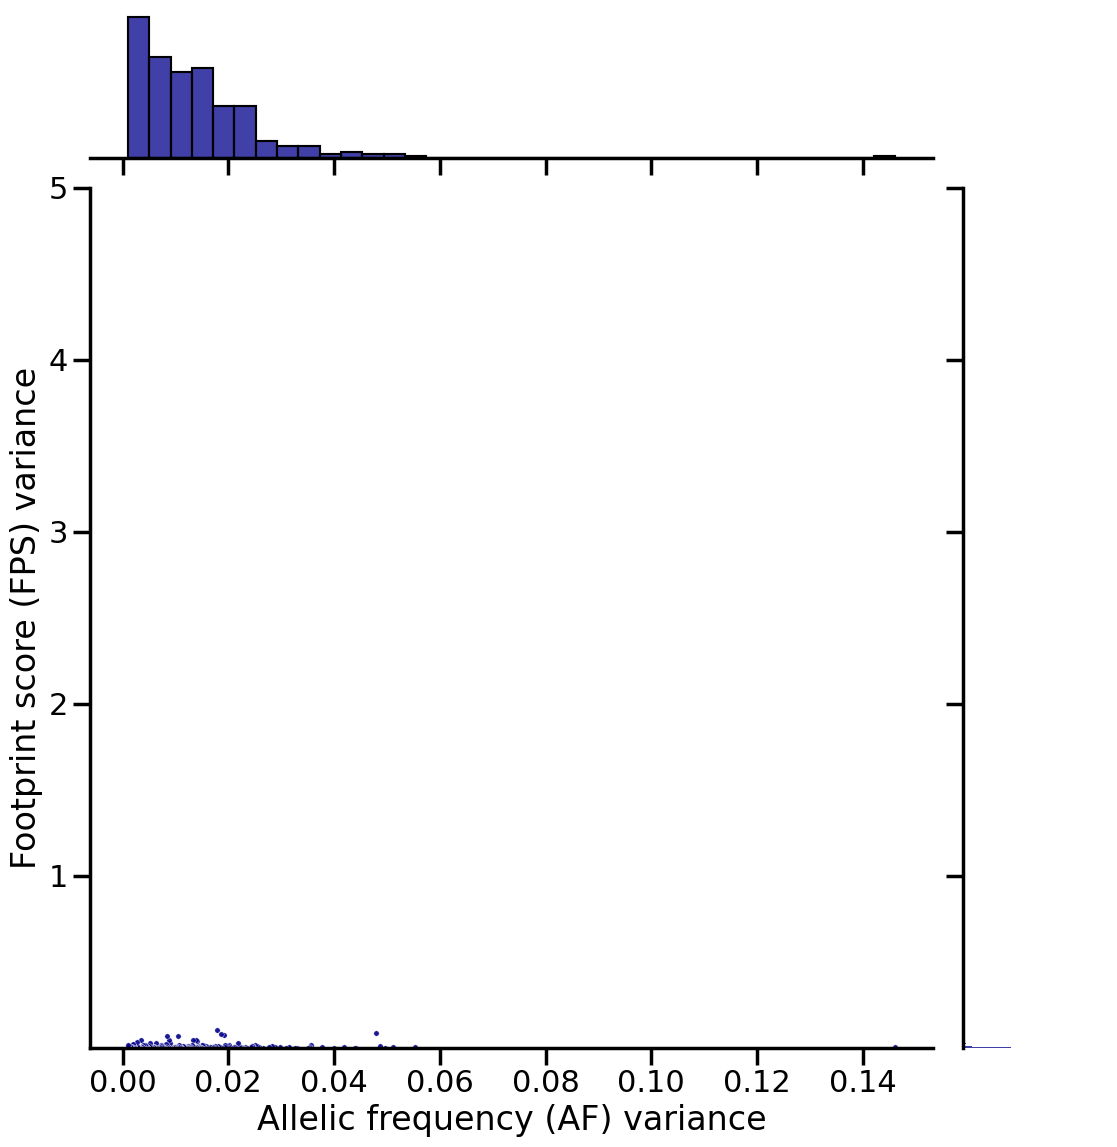

In [92]:
# plot scatterplot of AF variance vs FPS variance
sns.set_context("poster", rc={"figure.dpi": 300})
sns.jointplot(data=variance_df[(variance_df['af_var'] > 0.001) & (variance_df['fps_var'] > 0.001)], x='af_var', y='fps_var', height=12, s=15, alpha=0.9, color='darkblue')
plt.xlabel('Allelic frequency (AF) variance')
plt.ylabel('Footprint score (FPS) variance')
plt.ylim(0.0001, 5)
plt.show()

In [72]:
variance_df['region_id'].nunique()


2795

In [65]:
print(f'{motif_id} \t {len(variance_df)}')

ASCL1_M08055_2.00 	 2795
